[](http://)

#                                     **PREDICTION OF DEPRESSION, ANXIETY AND STRESS**

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
data=pd.read_csv('./data.csv',delimiter='\t')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


**Removing columns stating the time or position where the questions were answered**

**Also Removing columns**

Introelapse->The time spent on the introduction/landing page

Testelapse->The time spent on all the DASS questions 

Surveyelapse->The time spent answering the rest of the demographic and survey questions



**The Ten Item Personality Inventory was administered**.

**The TIPI items were rated "I see myself as:" _____ such that**

* 1 = Disagree strongly
* 2 = Disagree moderately
* 3 = Disagree a little
* 4 = Neither agree nor disagree
* 5 = Agree a little
* 6 = Agree moderately
* 7 = Agree strongly 

In [4]:
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1)
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
data_2 = data_2.drop(columns=['engnat', 'screensize', 'uniquenetworklocation', 'hand', 'voted', 'major', 'country'])
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 61)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'age', 'religion', 'orientation', 'race', 'married',
       'familysize'],
      dtype='object')


In [5]:
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Conventional-uncreative,education,urban,gender,age,religion,orientation,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,16,12,1,10,1,2
1,4,1,2,3,4,4,3,4,3,2,...,5,2,3,2,16,7,3,70,1,4
2,3,1,4,1,4,3,1,3,2,4,...,2,2,3,2,17,4,3,60,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,13,4,5,70,1,5
4,2,2,3,4,4,2,4,4,4,3,...,3,3,2,2,19,10,1,10,1,4


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Q1A                              39775 non-null  int64
 1   Q2A                              39775 non-null  int64
 2   Q3A                              39775 non-null  int64
 3   Q4A                              39775 non-null  int64
 4   Q5A                              39775 non-null  int64
 5   Q6A                              39775 non-null  int64
 6   Q7A                              39775 non-null  int64
 7   Q8A                              39775 non-null  int64
 8   Q9A                              39775 non-null  int64
 9   Q10A                             39775 non-null  int64
 10  Q11A                             39775 non-null  int64
 11  Q12A                             39775 non-null  int64
 12  Q13A                             39775 non-nul

### Finding missing values and handeling 

In [7]:
df = data_2.copy()
df.isnull().sum()

Q1A            0
Q2A            0
Q3A            0
Q4A            0
Q5A            0
              ..
religion       0
orientation    0
race           0
married        0
familysize     0
Length: 61, dtype: int64

In [8]:
# ploting missing values 
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

No NAs found


### convert age in categorical values

In [9]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

df['Age_Groups']=df['age'].apply(condition)
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,education,urban,gender,age,religion,orientation,race,married,familysize,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,2,3,2,16,12,1,10,1,2,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,2,3,2,16,7,3,70,1,4,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,2,3,2,17,4,3,60,1,3,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,3,2,13,4,5,70,1,5,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,3,2,2,19,10,1,10,1,4,Secondary Children


In [10]:
new_data=df.iloc[:,42:]
data_3=df.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [87]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)


**Scoring as per given answers for the respective set of Depression,Anxiety,Stress questions**

In [88]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

**After scoring is done combining these three sets back with the the rest of the table**

**Therefore now have 3 dataframes to work with as of Depression,Anxiety,Stress**

 # Depression Set

In [89]:
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


In [90]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,education,urban,gender,age,religion,orientation,race,married,familysize,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,...,2,3,2,16,12,1,10,1,2,Primary Children
1,1,3,1,3,2,3,1,1,2,1,...,2,3,2,16,7,3,70,1,4,Primary Children
2,3,3,3,3,3,3,3,3,0,3,...,2,3,2,17,4,3,60,1,3,Secondary Children
3,1,2,2,0,1,2,0,0,1,2,...,1,3,2,13,4,5,70,1,5,Primary Children
4,2,3,2,3,2,3,2,1,3,2,...,3,2,2,19,10,1,10,1,4,Secondary Children


In [91]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,urban,gender,age,religion,orientation,race,married,familysize,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,3,2,16,12,1,10,1,2,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,3,2,16,7,3,70,1,4,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,3,2,17,4,3,60,1,3,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,3,2,13,4,5,70,1,5,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,2,19,10,1,10,1,4,Secondary Children,Extremely Severe


Text(0.5, 1.0, 'People Condition of Depression Level')

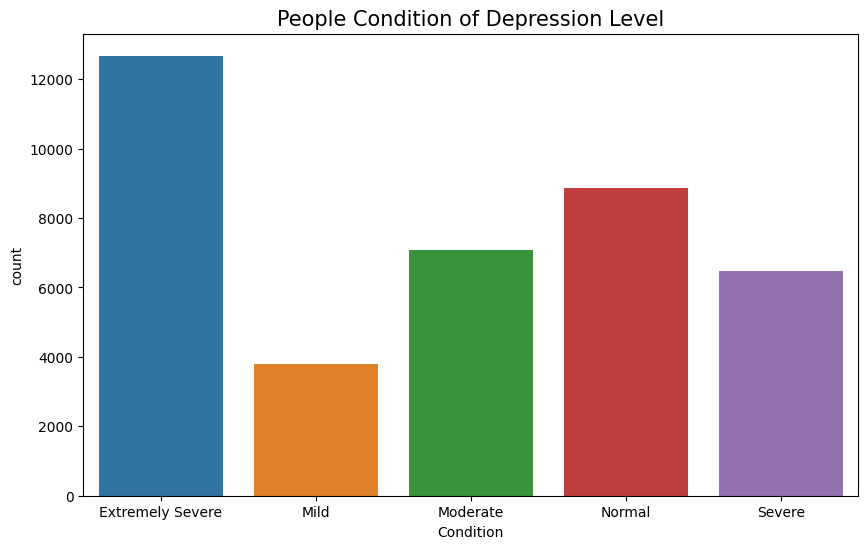

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(data=Depression, x=Depression.sort_values('Condition').Condition)
plt.title('People Condition of Depression Level',fontsize=15)

# Stress Set

In [93]:
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


In [94]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,education,urban,gender,age,religion,orientation,race,married,familysize,Age_Groups
0,3,3,3,3,3,3,3,3,3,3,...,2,3,2,16,12,1,10,1,2,Primary Children
1,3,3,3,1,1,3,1,2,2,2,...,2,3,2,16,7,3,70,1,4,Primary Children
2,2,2,2,1,0,0,1,2,1,1,...,2,3,2,17,4,3,60,1,3,Secondary Children
3,1,2,1,1,0,3,0,0,3,2,...,1,3,2,13,4,5,70,1,5,Primary Children
4,1,1,3,1,3,3,3,2,1,1,...,3,2,2,19,10,1,10,1,4,Secondary Children


In [95]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,urban,gender,age,religion,orientation,race,married,familysize,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,3,2,16,12,1,10,1,2,Primary Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,3,2,16,7,3,70,1,4,Primary Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,3,2,17,4,3,60,1,3,Secondary Children,Mild
3,1,2,1,1,0,3,0,0,3,2,...,3,2,13,4,5,70,1,5,Primary Children,Mild
4,1,1,3,1,3,3,3,2,1,1,...,2,2,19,10,1,10,1,4,Secondary Children,Severe


Text(0.5, 1.0, 'People Condition for Stress Level')

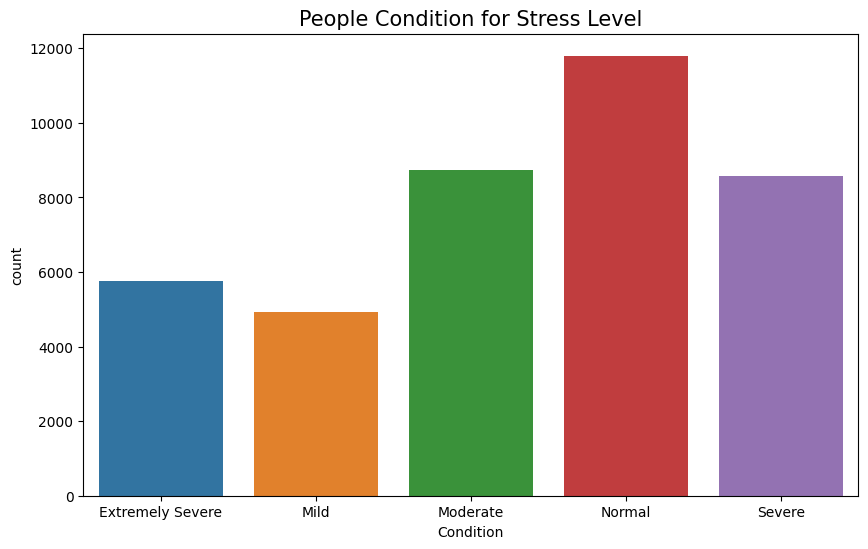

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(data=Stress, x=Stress.sort_values('Condition').Condition)
plt.title('People Condition for Stress Level',fontsize=15)

# Anxiety Set

In [97]:
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [98]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,education,urban,gender,age,religion,orientation,race,married,familysize,Age_Groups
0,3,3,3,1,3,2,2,3,3,2,...,2,3,2,16,12,1,10,1,2,Primary Children
1,0,2,2,2,2,0,0,0,1,3,...,2,3,2,16,7,3,70,1,4,Primary Children
2,0,0,0,1,3,1,0,1,1,0,...,2,3,2,17,4,3,60,1,3,Secondary Children
3,2,0,3,2,1,0,1,0,0,0,...,1,3,2,13,4,5,70,1,5,Primary Children
4,1,3,3,3,3,3,3,3,3,3,...,3,2,2,19,10,1,10,1,4,Secondary Children


In [99]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,urban,gender,age,religion,orientation,race,married,familysize,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,3,2,16,12,1,10,1,2,Primary Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,3,2,16,7,3,70,1,4,Primary Children,Severe
2,0,0,0,1,3,1,0,1,1,0,...,3,2,17,4,3,60,1,3,Secondary Children,Moderate
3,2,0,3,2,1,0,1,0,0,0,...,3,2,13,4,5,70,1,5,Primary Children,Severe
4,1,3,3,3,3,3,3,3,3,3,...,2,2,19,10,1,10,1,4,Secondary Children,Extremely Severe


Text(0.5, 1.0, 'People Condition for Anxiety Level')

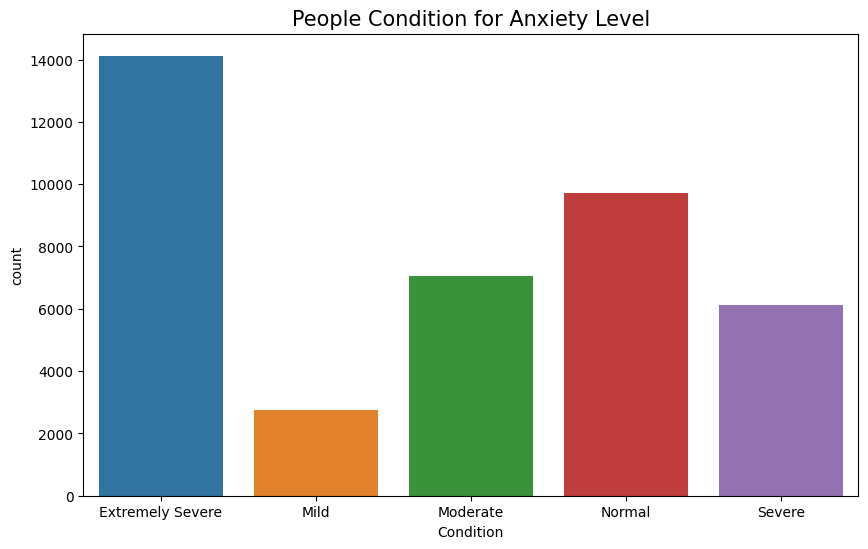

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('Condition').Condition)
plt.title('People Condition for Anxiety Level',fontsize=15)

# **Comparing different answers given for situations like gender, marriage, education, races etc and comparing with their Anxiety, Depression or Stress Conditions**

# Genders

* 1=Male
* 2=Female
* 3=Other

In [101]:
print('Count of People participated as of Gender\n',data_2['gender'].value_counts())

Count of People participated as of Gender
 2    30367
1     8789
3      619
Name: gender, dtype: int64


Text(0.5, 1.0, 'Depression Condition of Different Gender')

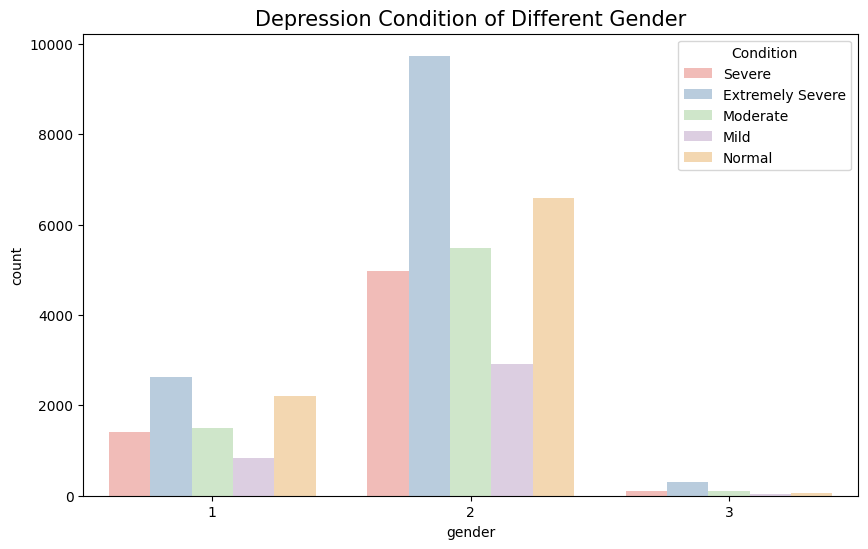

In [102]:
plt.figure(figsize=(10,6))
sns.countplot(data=Depression, x=Depression.sort_values('gender').gender,hue=Depression['Condition'],palette='Pastel1')
plt.title('Depression Condition of Different Gender',fontsize=15)

Text(0.5, 1.0, 'Stress Condition of Different Gender')

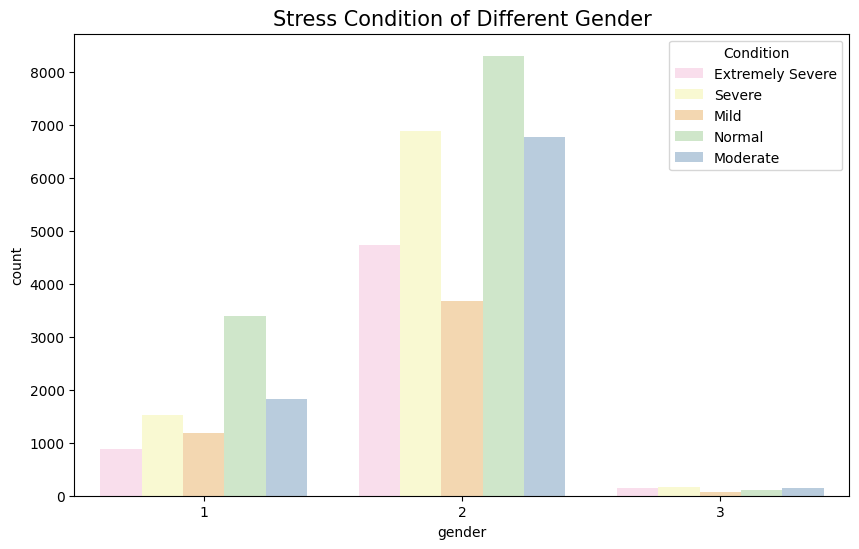

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(data=Stress, x=Stress.sort_values('gender').gender,hue=Stress['Condition'],palette='Pastel1_r')
plt.title('Stress Condition of Different Gender',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition of Different Gender')

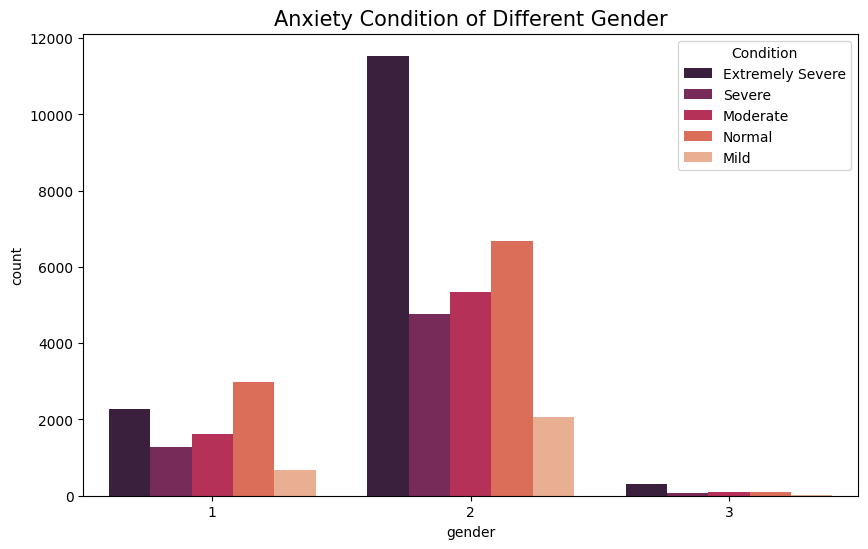

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('gender').gender,hue=Anxiety['Condition'],palette='rocket')
plt.title('Anxiety Condition of Different Gender',fontsize=15)

# Martial Status

* 1=Never married
* 2=Currently married
* 3=Previously married

In [105]:
Depression['married'].value_counts()

1    34131
2     4357
3     1287
Name: married, dtype: int64

*People participating were mostly single and not married at the time of answers*

Text(0.5, 1.0, 'Depression State of People as of Married or Not')

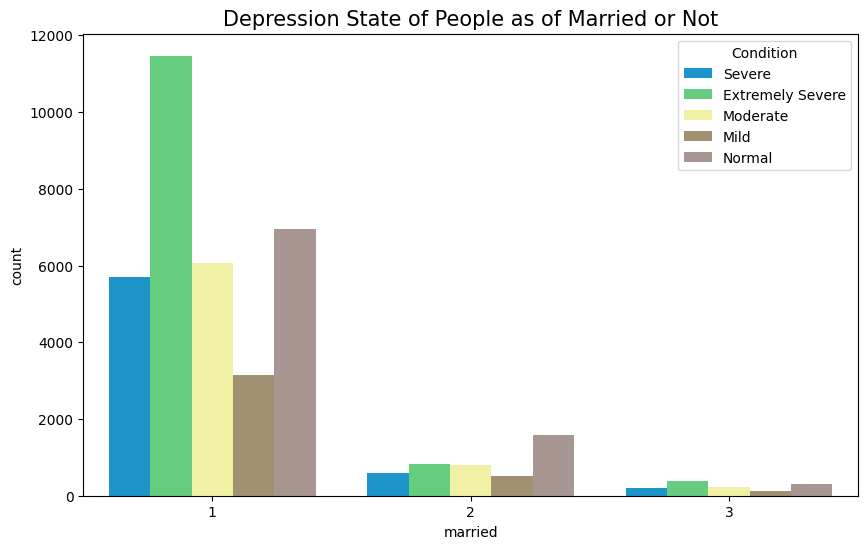

In [106]:
plt.figure(figsize=(10,6))
sns.countplot(data=Depression, x=Depression.sort_values('married').married,hue=Depression['Condition'],palette='terrain')
plt.title('Depression State of People as of Married or Not',fontsize=15)


Text(0.5, 1.0, 'Stress State of People as of Married or Not')

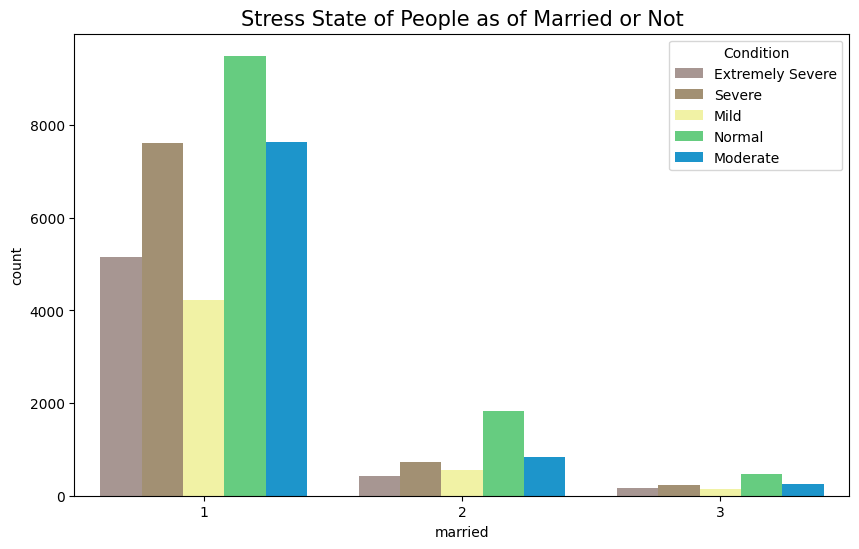

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(data=Stress, x=Stress.sort_values('married').married,hue=Stress['Condition'],palette='terrain_r')
plt.title('Stress State of People as of Married or Not',fontsize=15)

Text(0.5, 1.0, 'Anxiety State of People as of Married or Not')

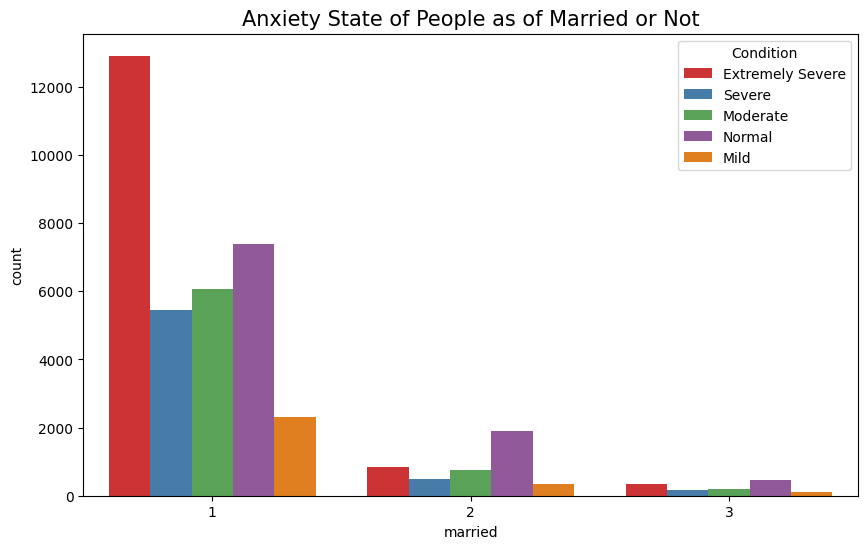

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('married').married,hue=Anxiety['Condition'],palette='Set1')
plt.title('Anxiety State of People as of Married or Not',fontsize=15)

**Comparing results**
> Never Married
* Moslty had extremely severe conditions for Depression and Anxiety.

> Married
* Moslty were normal

> Divorced
* As per the people participated Most people were in Extreme Severe for depressive state

# Religions

* 1=Agnostic
* 2=Atheist
* 3=Buddhist
* 4=Christian (Catholic)
* 5=Christian (Mormon)
* 6=Christian (Protestant)
* 7=Christian (Other)
* 8=Hindu
* 9=Jewish 
* 10=Muslim 
* 11=Sikh
* 12=Other

In [109]:
data_2['religion'].value_counts(ascending=True)

11       64
5       122
9       144
8       700
3       883
6      1544
12     1804
7      2254
4      3097
1      3245
2      3845
10    22073
Name: religion, dtype: int64

*People who participated to answers were moslty from Muslim religion*

Text(0.5, 1.0, 'Depression Condition as per Religion')

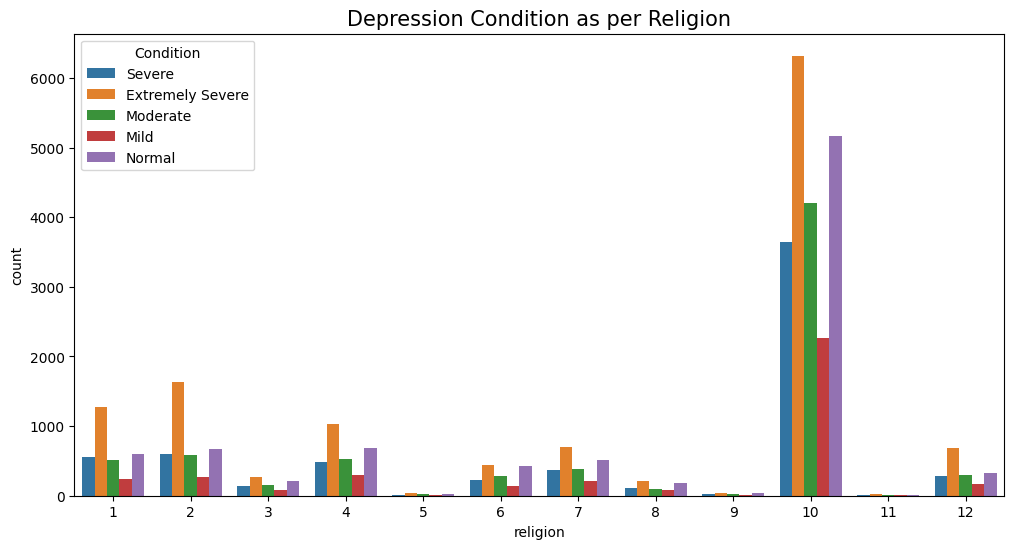

In [110]:
plt.figure(figsize=(12,6))
a=sns.countplot(data=Depression, x=Depression.sort_values('religion').religion,hue=Depression['Condition'])
plt.title('Depression Condition as per Religion',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per Religion')

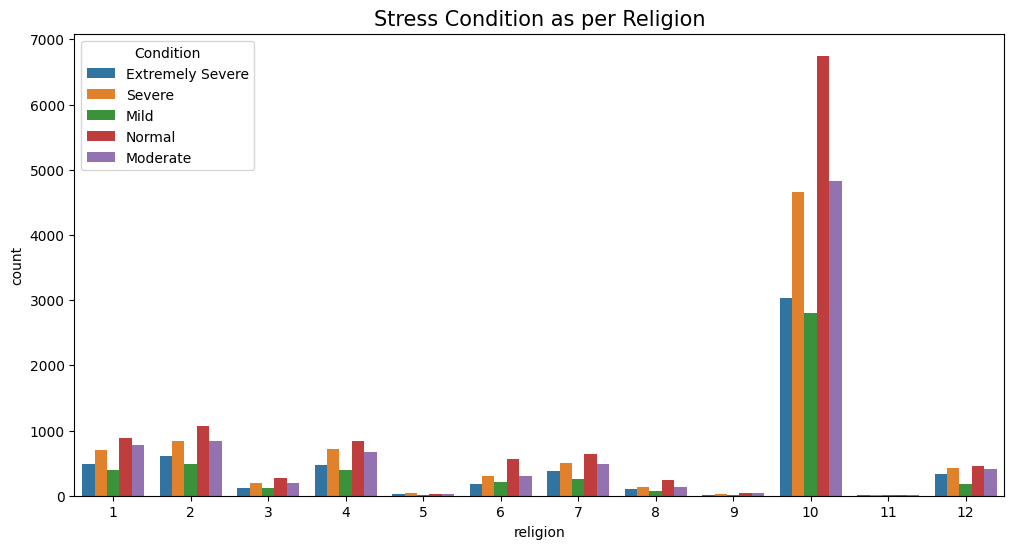

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(data=Stress, x=Stress.sort_values('religion').religion,hue=Stress['Condition'])
plt.title('Stress Condition as per Religion',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition as per Religion')

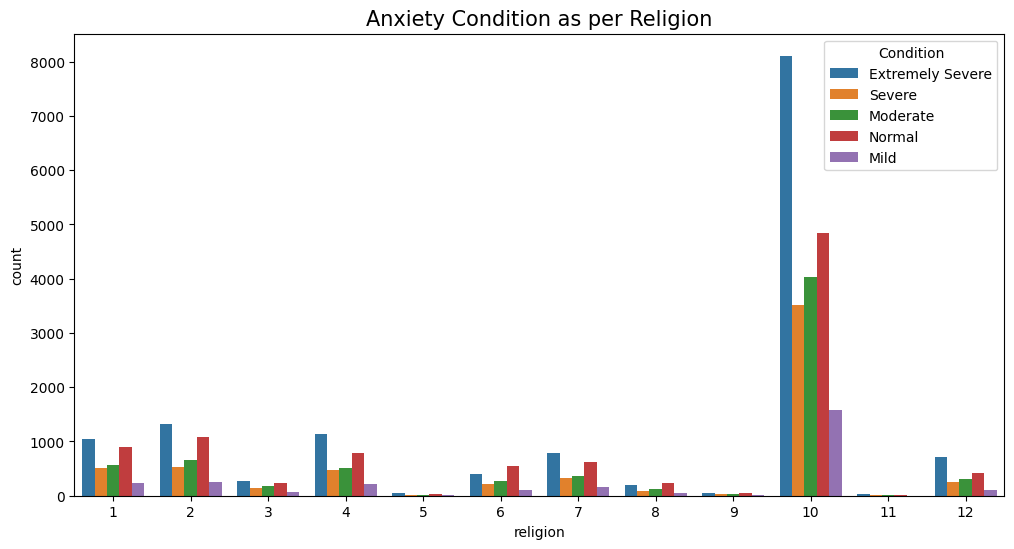

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('religion').religion,hue=Anxiety['Condition'])
plt.title('Anxiety Condition as per Religion',fontsize=15)

# Races 

* 10=Asian 
* 20=Arab 
* 30=Black 
* 40=Indigenous Australian 
* 50=Native American
* 60=White
* 70=Other

In [113]:
print('Counts of answered recorded as per races\n',data_2['race'].value_counts())

Counts of answered recorded as per races
 10    23106
60    10659
70     4832
30      603
20      333
50      220
40       22
Name: race, dtype: int64


Text(0.5, 1.0, 'Depression Condition as per Race')

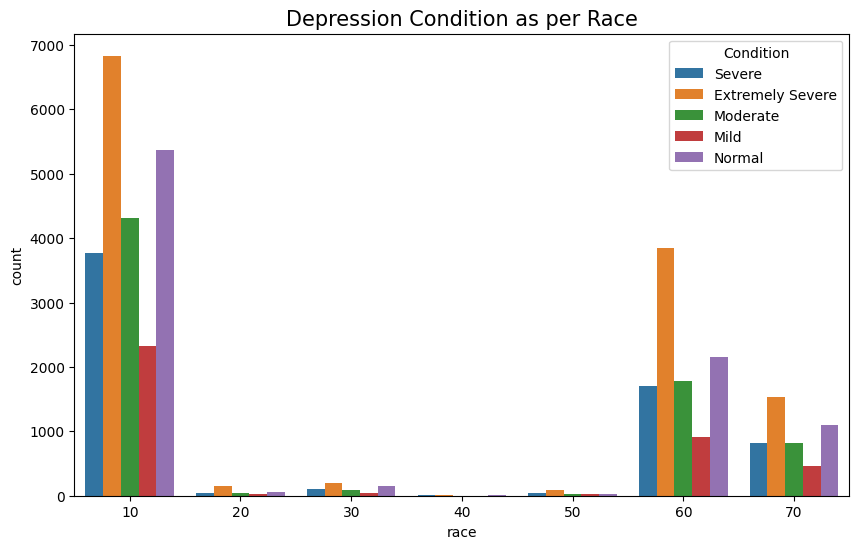

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(data=Depression, x=Depression.sort_values('race').race,hue=Depression['Condition'])
plt.title('Depression Condition as per Race',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per Race')

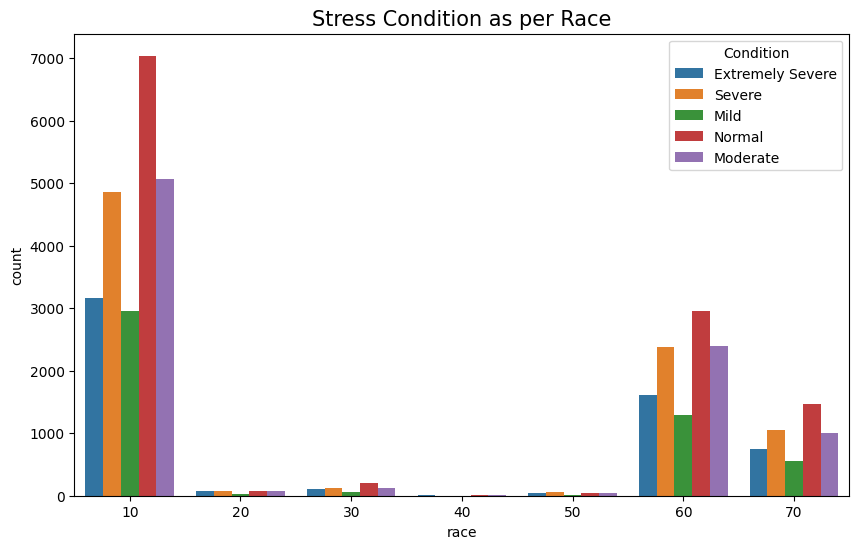

In [115]:
plt.figure(figsize=(10,6))
sns.countplot(data=Stress, x=Stress.sort_values('race').race,hue=Stress['Condition'])
plt.title('Stress Condition as per Race',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition as per Race')

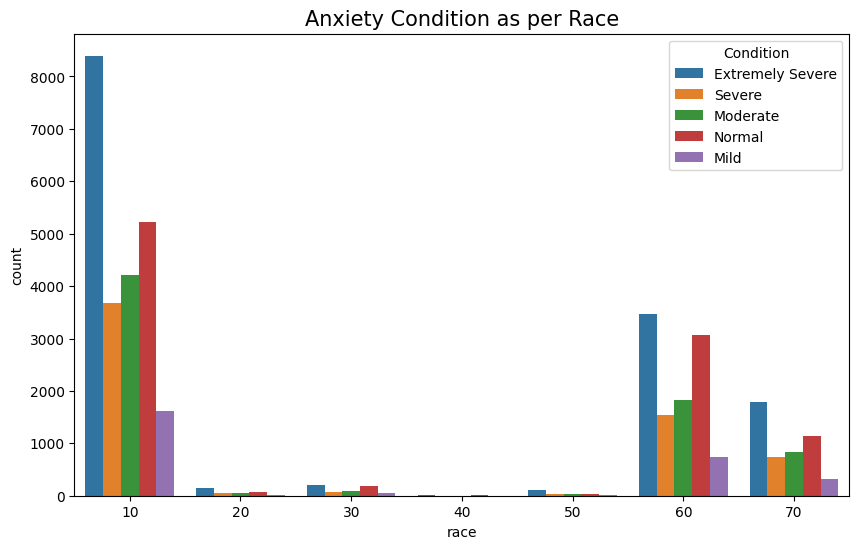

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('race').race,hue=Anxiety['Condition'])
plt.title('Anxiety Condition as per Race',fontsize=15)

# Sexual Orientation

* 1=Heterosexual
* 2=Bisexual
* 3=Homosexual 
* 4=Asexual
* 5=Other

In [117]:
print('Count of answered recorded as per sexual Orientation \n',data_2['orientation'].value_counts())

Count of answered recorded as per sexual Orientation 
 1    24269
3     5064
2     5006
5     3460
4     1976
Name: orientation, dtype: int64


Text(0.5, 1.0, 'Depression Condition as per different sexual Orientations')

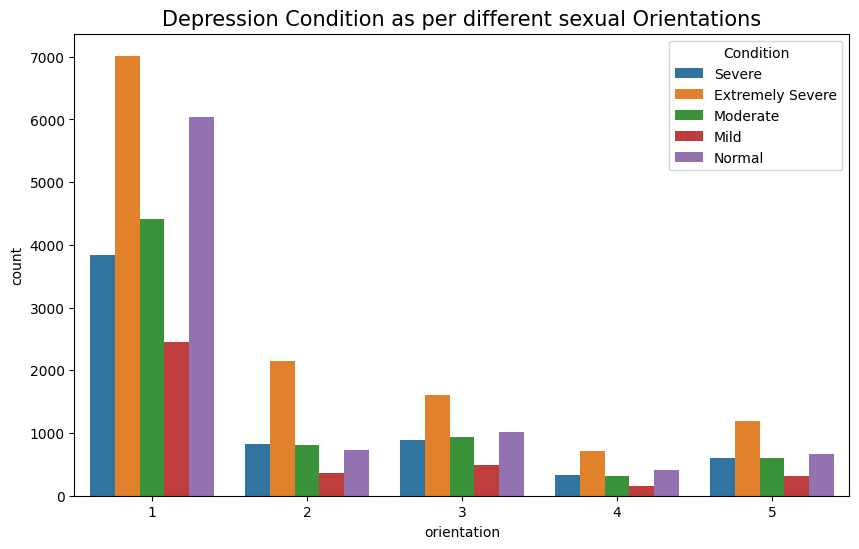

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(data=Depression, x=Depression.sort_values('orientation').orientation,hue=Depression['Condition'])
plt.title('Depression Condition as per different sexual Orientations',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per different sexual Orientations')

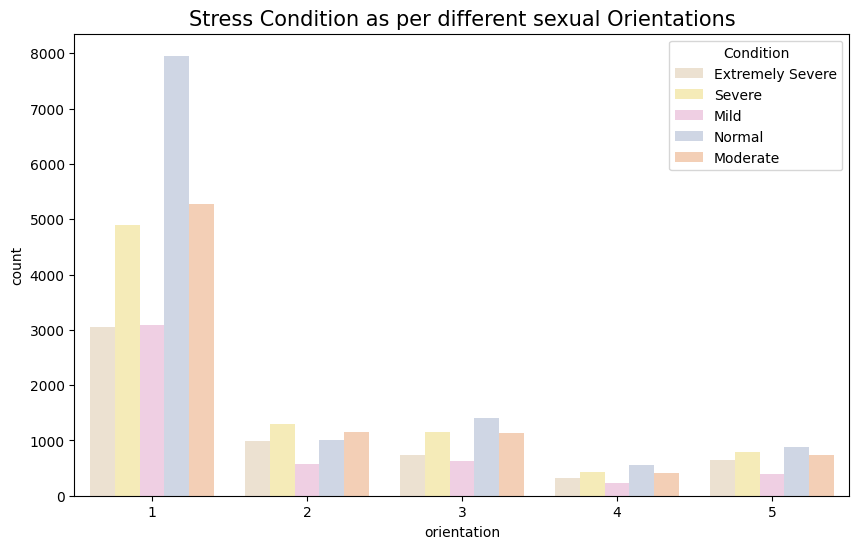

In [119]:
plt.figure(figsize=(10,6))
sns.countplot(data=Stress, x=Stress.sort_values('orientation').orientation,hue=Stress['Condition'],palette='Pastel2_r')
plt.title('Stress Condition as per different sexual Orientations',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition as per different sexual Orientations')

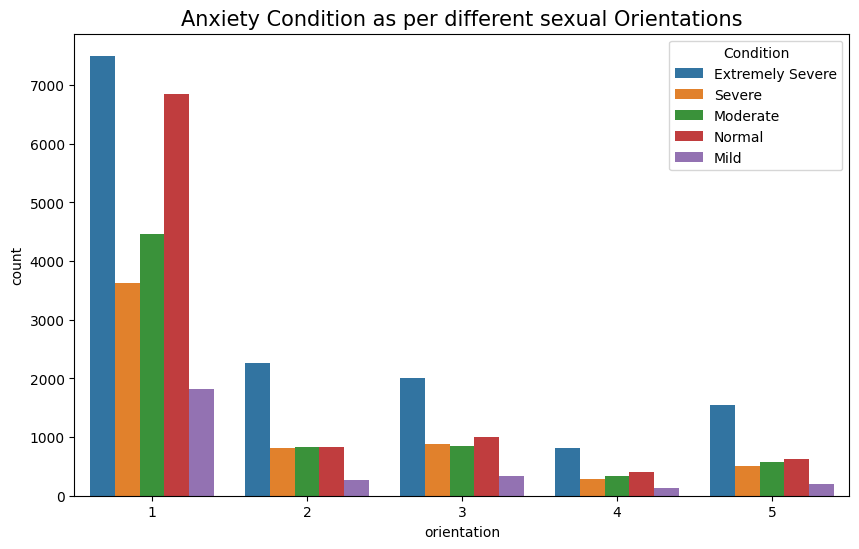

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('orientation').orientation,hue=Anxiety['Condition'])
plt.title('Anxiety Condition as per different sexual Orientations',fontsize=15)

**All different sexual orientations given the participation,mostly were extremely severe for Depression and Anxiety**

# Age Groups

*Where*
* Under 10
* Primary(10-16)
* Secondary(17-21)
* Adults(21-35)
* Elder Adults(36-48)
* Older people(49+)
       

In [122]:
print('Counts of answered recorded as per age groups\n',df['Age_Groups'].value_counts())

Counts of answered recorded as per age groups
 Secondary Children    16189
Adults                15388
 Primary Children      4960
Elder Adults           2082
Older People           1156
Name: Age_Groups, dtype: int64


Text(0.5, 1.0, 'Depression Condition as per different Age Groups')

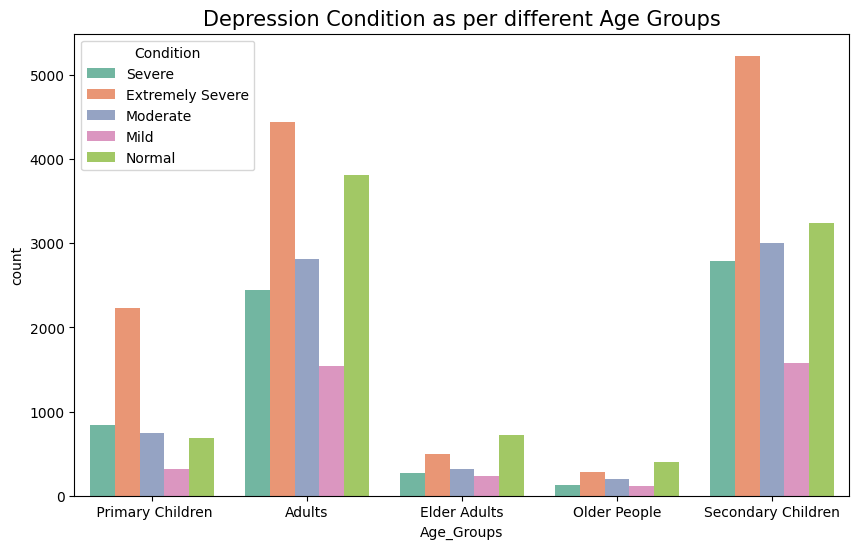

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(data=Depression, x=Depression.sort_values('Age_Groups').Age_Groups,hue=Depression['Condition'],palette='Set2')
plt.title('Depression Condition as per different Age Groups',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per different Age Groups')

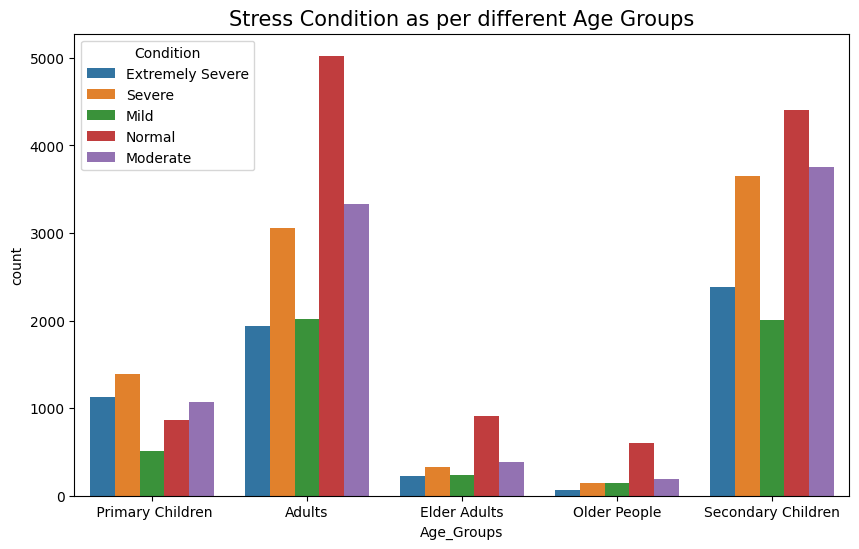

In [124]:
plt.figure(figsize=(10,6))
sns.countplot(data=Stress, x=Stress.sort_values('Age_Groups').Age_Groups,hue=Stress['Condition'])
plt.title('Stress Condition as per different Age Groups',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition as per different Age Groups')

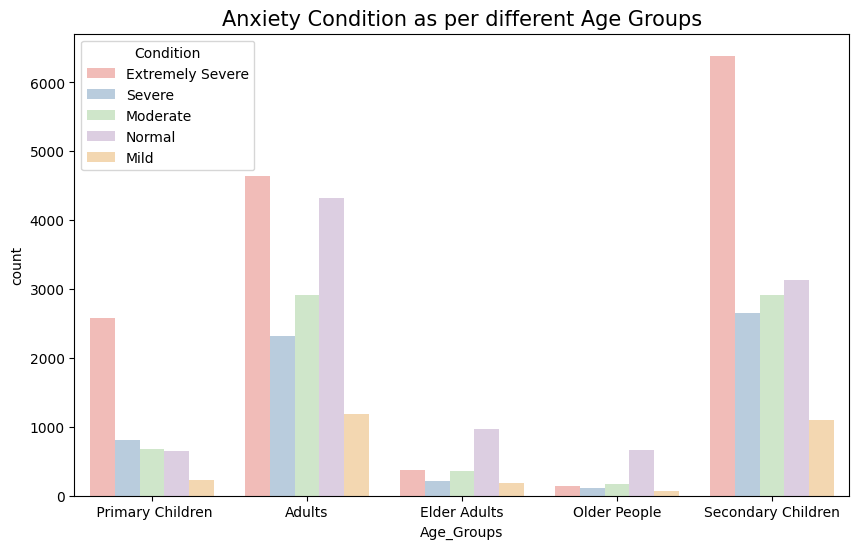

In [125]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('Age_Groups').Age_Groups,hue=Anxiety['Condition'],palette='Pastel1')
plt.title('Anxiety Condition as per different Age Groups',fontsize=15)

# Education level

*  1=Less than high school 
*  2=High school
*  3=University degree
*  4=Graduate degree

In [127]:
print('Counts of answered recorded as per the Education \n',df['education'].value_counts())

Counts of answered recorded as per the Education 
 3    15635
2    15066
4     5008
1     4066
Name: education, dtype: int64


Text(0.5, 1.0, 'Depression Condition as per different Education levels')

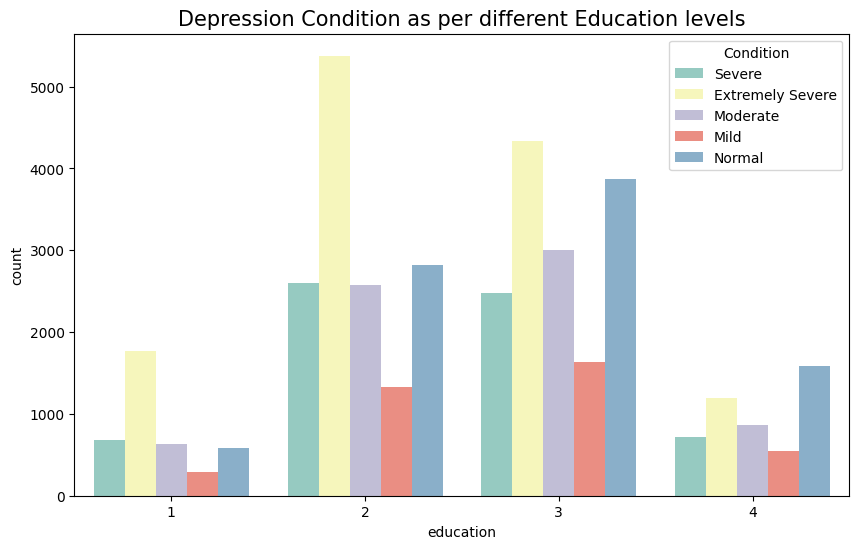

In [128]:
plt.figure(figsize=(10,6))
sns.countplot(data=Depression, x=Depression.sort_values('education').education,hue=Depression['Condition'],palette='Set3')
plt.title('Depression Condition as per different Education levels',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per different Education levels')

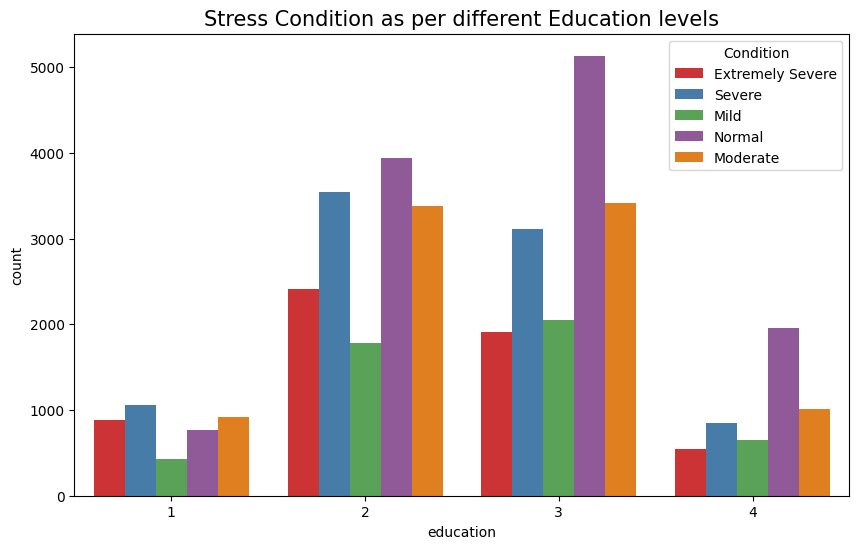

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(data=Stress, x=Stress.sort_values('education').education,hue=Stress['Condition'],palette='Set1')
plt.title('Stress Condition as per different Education levels',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition as per different Education levels')

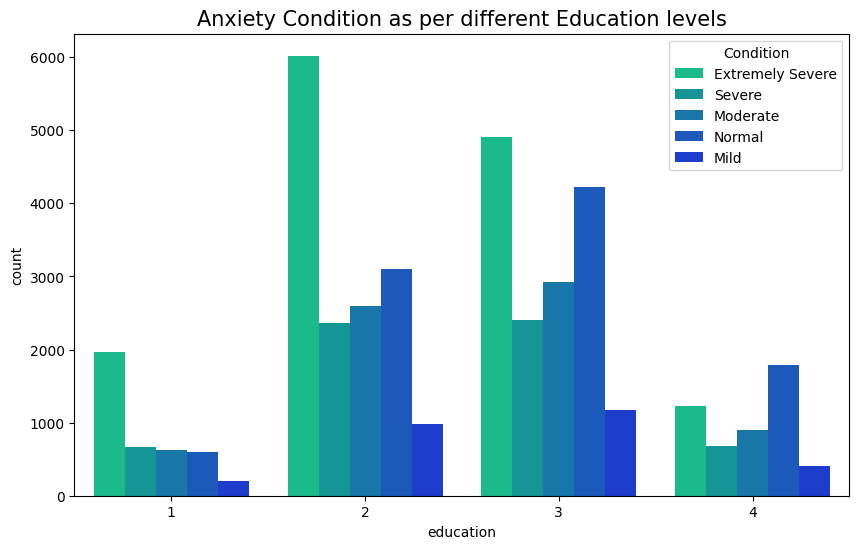

In [130]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x=Anxiety.sort_values('education').education,hue=Anxiety['Condition'],palette='winter_r')
plt.title('Anxiety Condition as per different Education levels',fontsize=15)

### Convert agegroup string to integer

In [131]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
    

    
Depression['Age_Groups']=Depression['Age_Groups'].apply(change_var)
Stress['Age_Groups']=Stress['Age_Groups'].apply(change_var)
Anxiety['Age_Groups']=Anxiety['Age_Groups'].apply(change_var)



In [132]:
Depression=Depression.dropna()
Stress=Stress.dropna()
Anxiety=Anxiety.dropna()

In [134]:
Depression=Depression.drop(columns=['Total_Count','age'])
Stress=Stress.drop(columns=['Total_Count','age'])
Anxiety=Anxiety.drop(columns=['Total_Count','age'])


# Model Creation for predictions

In [135]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

 >  # 1. Model for Depression

In [150]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender','religion',
        'orientation', 'race', 'married', 'familysize',
        'Age_Groups']]
y=Depression[['Condition']].values
y = y.flatten()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [151]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (22134, 33) (22134,)
Test Set: (11919, 33) (11919,)


**Random Forest**

Accuracy: 0.925
F1_Score: 0.922
Recall_Score: 0.925
Precision_Score: 0.924
Cross Validation Score: 0.928
                  precision    recall  f1-score   support

Extremely Severe     0.9880    0.9829    0.9855      3691
            Mild     0.8701    0.6480    0.7428      1230
        Moderate     0.8589    0.9130    0.8852      2254
          Normal     0.9343    0.9785    0.9559      2834
          Severe     0.8978    0.9246    0.9110      1910

        accuracy                         0.9247     11919
       macro avg     0.9098    0.8894    0.8961     11919
    weighted avg     0.9242    0.9247    0.9225     11919



C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


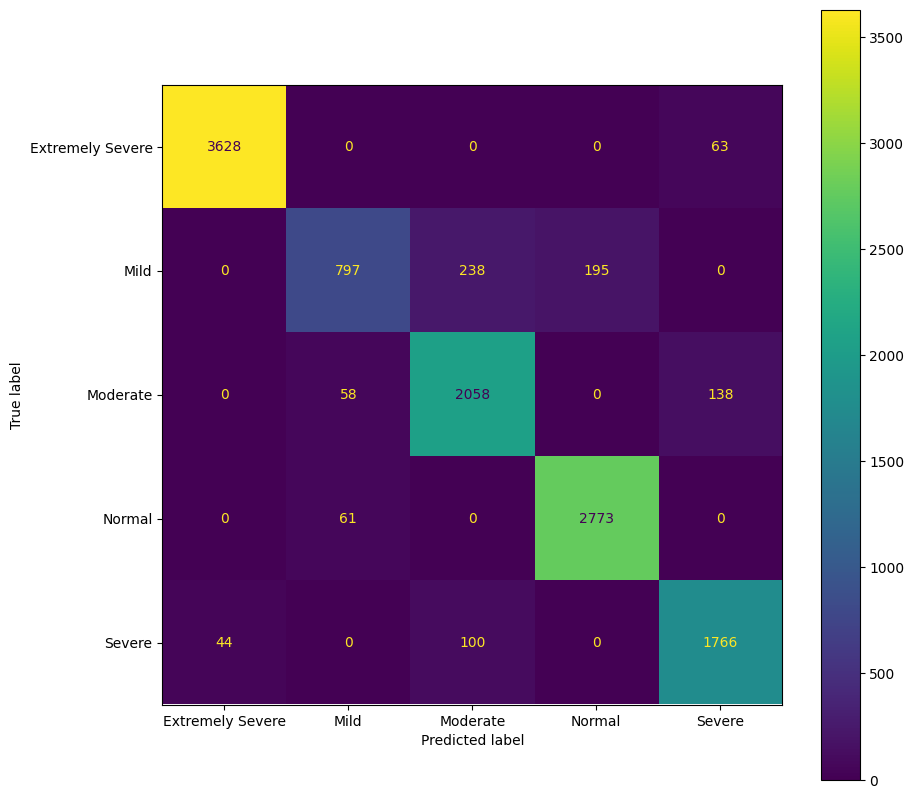

In [153]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

**2. Decision Trees**

Accuracy: 0.792
F1_Score: 0.793
Recall_Score: 0.792
Precision_Score: 0.794
Cross Validation Score: 0.794
                  precision    recall  f1-score   support

Extremely Severe     0.9261    0.9336    0.9298      3691
            Mild     0.5205    0.5561    0.5377      1230
        Moderate     0.6748    0.6912    0.6829      2254
          Normal     0.9065    0.8790    0.8925      2834
          Severe     0.6880    0.6581    0.6727      1910

        accuracy                         0.7917     11919
       macro avg     0.7432    0.7436    0.7431     11919
    weighted avg     0.7939    0.7917    0.7926     11919



C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


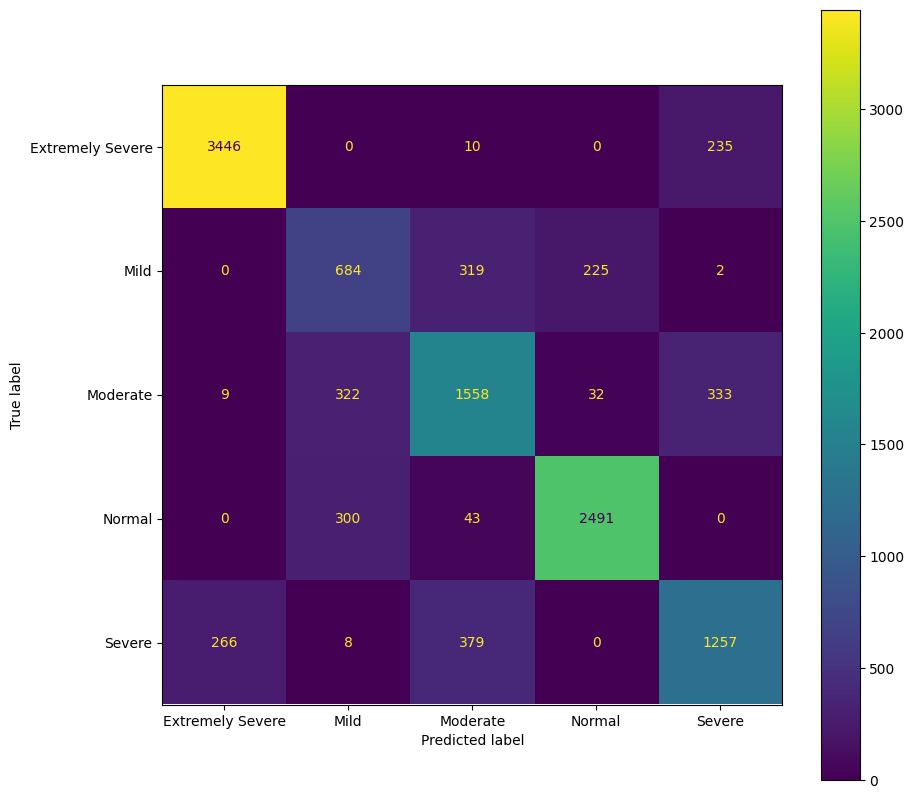

In [162]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT,X_test_scaled,y_test,ax=ax)

**Gaussian Naive Bayes**

Accuracy: 0.873
F1_Score: 0.879
Recall_Score: 0.873
Precision_Score: 0.896
Cross Validation Score: 0.876
                  precision    recall  f1-score   support

Extremely Severe     0.9991    0.8849    0.9385      3691
            Mild     0.6197    0.8439    0.7146      1230
        Moderate     0.8704    0.8585    0.8644      2254
          Normal     0.9950    0.8359    0.9085      2834
          Severe     0.7600    0.9435    0.8419      1910

        accuracy                         0.8734     11919
       macro avg     0.8488    0.8733    0.8536     11919
    weighted avg     0.8963    0.8734    0.8788     11919



C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


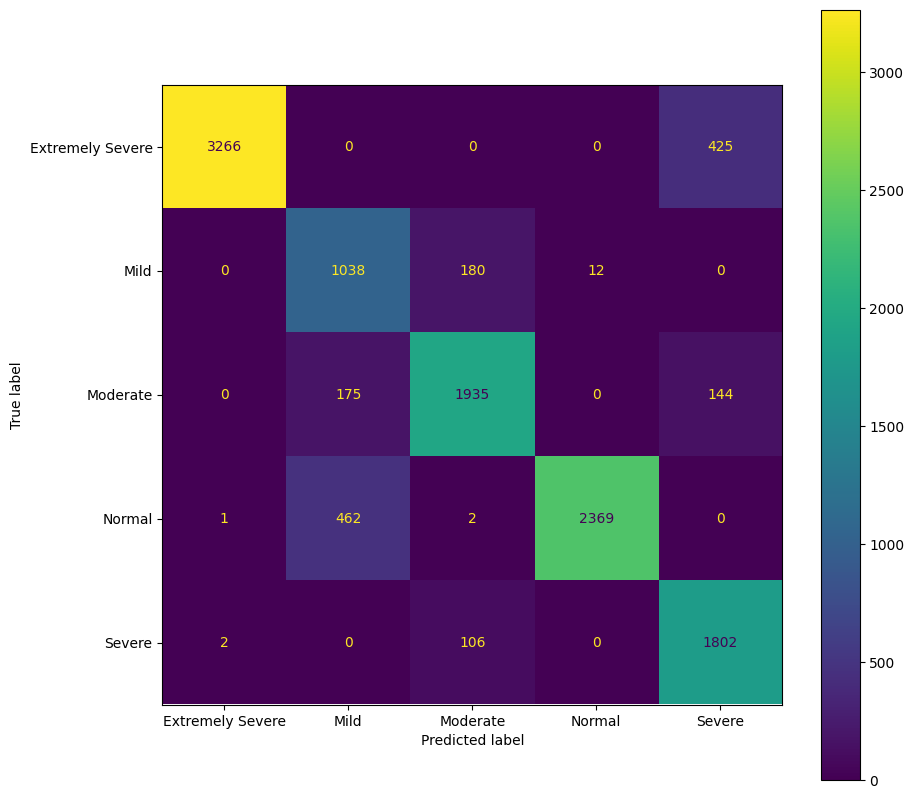

In [154]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb,X_test_scaled,y_test,ax=ax)

**Nearest Neighbours**

Accuracy: 0.886
F1_Score: 0.881
Recall_Score: 0.886
Precision_Score: 0.885
Cross Validation Score: 0.885
                  precision    recall  f1-score   support

Extremely Severe     0.9750    0.9818    0.9784      3691
            Mild     0.7521    0.4984    0.5995      1230
        Moderate     0.7671    0.8988    0.8278      2254
          Normal     0.9041    0.9781    0.9397      2834
          Severe     0.9101    0.8005    0.8518      1910

        accuracy                         0.8863     11919
       macro avg     0.8617    0.8315    0.8394     11919
    weighted avg     0.8854    0.8863    0.8813     11919



C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


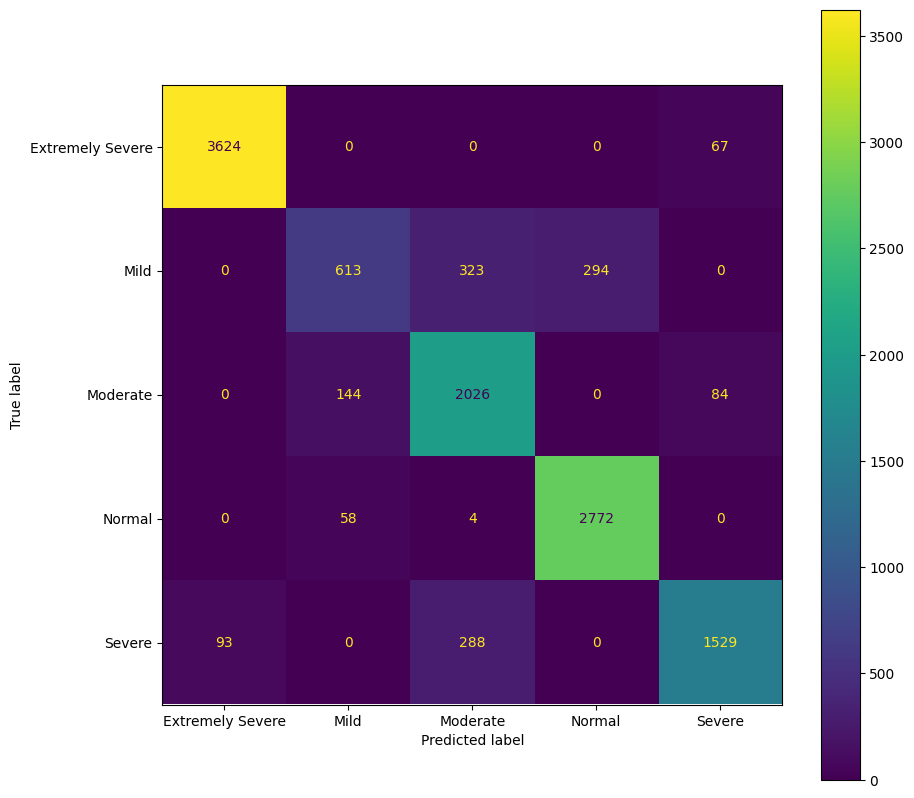

In [155]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn,X_test_scaled,y_test,ax=ax)

**Support Vector Machines**

Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0
Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      3691
            Mild     1.0000    1.0000    1.0000      1230
        Moderate     1.0000    1.0000    1.0000      2254
          Normal     1.0000    1.0000    1.0000      2834
          Severe     1.0000    1.0000    1.0000      1910

        accuracy                         1.0000     11919
       macro avg     1.0000    1.0000    1.0000     11919
    weighted avg     1.0000    1.0000    1.0000     11919



C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


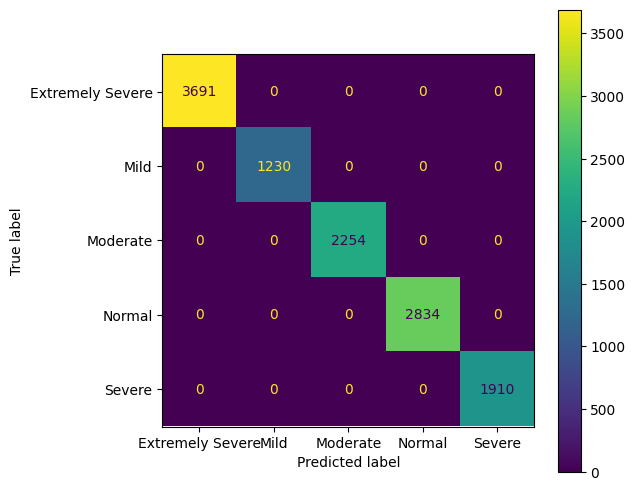

In [156]:
from sklearn.svm import SVC
svm=SVC(C=100,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(svm,X_test_scaled,y_test,ax=ax)

In [164]:
Result={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[Acc_ran*100,Acc_dt*100,Acc_gb*100,Acc_knn*100,Acc_svm*100],
                  'F1_Score(%)':[f1_ran*100,f1_dt*100,f1_gb*100,f1_knn*100,f1_svm*100],
                  'Precision(%)':[precision_ran*100,precision_dt*100,precision_gb*100,precision_knn*100,precision_svm*100],
                  'Recall(%)':[recall_ran*100,recall_dt*100,recall_gb*100,recall_knn*100,recall_svm*100],
                    }
Result_Depression=pd.DataFrame(Result)
Result_Depression.to_csv('./Result_Depression.csv', index=False)
                                                                                            
                                                                                                                

# # 2. Model For Stress

In [165]:
Stress.columns

Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'religion', 'orientation', 'race', 'married',
       'familysize', 'Age_Groups', 'Condition'],
      dtype='object')

In [168]:
scaler=MinMaxScaler()
X=Stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'religion',
        'orientation', 'race', 'familysize',
        'Age_Groups']]
y=Stress[['Condition']].values
y = y.flatten()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest**

Accuracy: 0.886
F1_Score: 0.884
Recall_Score: 0.886
Precision_Score: 0.887
Cross Validation Score: 0.8858546141841342


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     0.9672    0.9054    0.9353      1596
            Mild     0.8077    0.6093    0.6946      1551
        Moderate     0.7990    0.8998    0.8464      2646
          Normal     0.9494    0.9674    0.9583      3861
          Severe     0.8800    0.9064    0.8930      2532

        accuracy                         0.8863     12186
       macro avg     0.8807    0.8577    0.8655     12186
    weighted avg     0.8866    0.8863    0.8839     12186



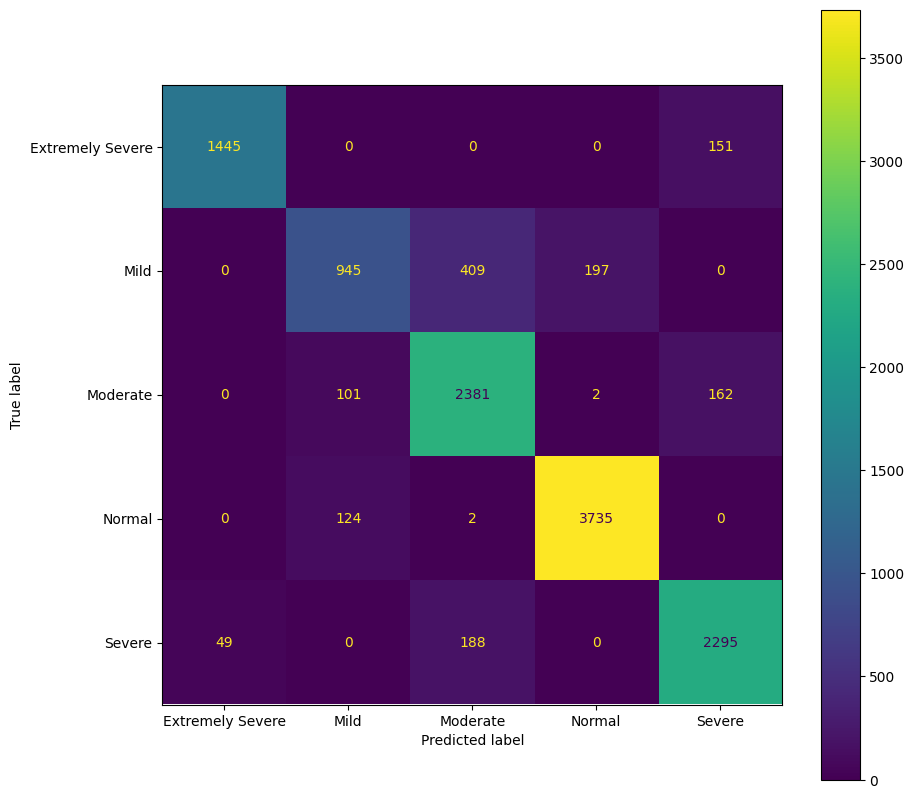

In [169]:
ran=RandomForestClassifier().fit(X_train_scaled,y_train)
acc_ran=round(accuracy_score(y_test,ran.predict(X_test_scaled)),3)
F1_ran=round(f1_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
prec_ran=round(precision_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
rec_ran=round(recall_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_ran)
print('F1_Score:',F1_ran)
print('Recall_Score:',rec_ran)
print('Precision_Score:',prec_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(ran, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ran,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=ran.predict(X_test_scaled))
print(classification)

**Decision Tree**

Accuracy: 0.74
F1_Score: 0.742
Recall_Score: 0.74
Precision_Score: 0.745
Cross Validation Score: 0.7423221523038791
                  precision    recall  f1-score   support

Extremely Severe     0.8303    0.8490    0.8395      1596
            Mild     0.4769    0.5119    0.4938      1551
        Moderate     0.6434    0.6580    0.6506      2646
          Normal     0.9043    0.8710    0.8873      3861
          Severe     0.7183    0.6991    0.7086      2532

        accuracy                         0.7404     12186
       macro avg     0.7146    0.7178    0.7160     12186
    weighted avg     0.7449    0.7404    0.7424     12186



C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


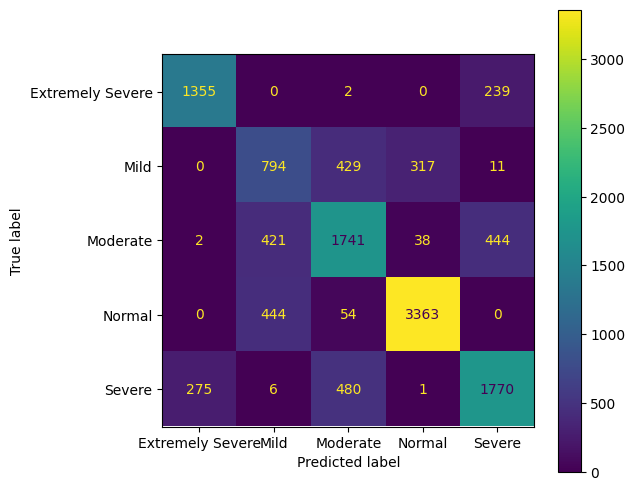

In [170]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 80, min_samples_leaf= 9, min_samples_split=9).fit(X_train_scaled,y_train)
acc_dt=round(accuracy_score(y_test,dt.predict(X_test_scaled)),3)
F1_dt=round(f1_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
prec_dt=round(precision_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
rec_dt=round(recall_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_dt)
print('F1_Score:',F1_dt)
print('Recall_Score:',rec_dt)
print('Precision_Score:',prec_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=dt.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(dt,X_test_scaled,y_test,ax=ax)

**Gaussian Naive Bayes**

Accuracy: 0.851
F1_Score: 0.856
Recall_Score: 0.851
Precision_Score: 0.871
Cross Validation Score: 0.8571298946706737


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     0.9590    0.8496    0.9010      1596
            Mild     0.5966    0.8001    0.6836      1551
        Moderate     0.8220    0.8745    0.8475      2646
          Normal     0.9889    0.8301    0.9026      3861
          Severe     0.8551    0.8902    0.8723      2532

        accuracy                         0.8510     12186
       macro avg     0.8443    0.8489    0.8414     12186
    weighted avg     0.8710    0.8510    0.8562     12186



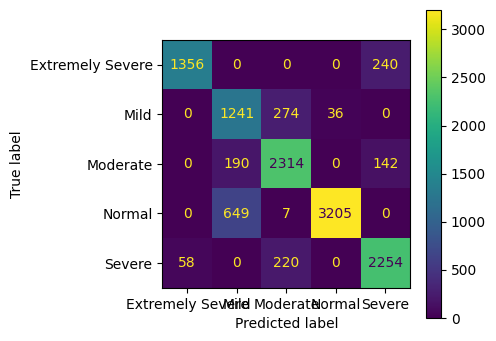

In [171]:
Gb=GaussianNB().fit(X_train_scaled,y_train)
acc_gb=round(accuracy_score(y_test,Gb.predict(X_test_scaled)),3)
F1_gb=round(f1_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
prec_gb=round(precision_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
rec_gb=round(recall_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_gb)
print('F1_Score:',F1_gb)
print('Recall_Score:',rec_gb)
print('Precision_Score:',prec_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(Gb, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(Gb,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Gb.predict(X_test_scaled))
print(classification)

**Nearest Neighbors**

Accuracy: 0.869
F1_Score: 0.867
Recall_Score: 0.869
Precision_Score: 0.867
Cross Validation Score: 0.8611520741301288


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     0.8847    0.9668    0.9240      1596
            Mild     0.6998    0.6402    0.6687      1551
        Moderate     0.8410    0.8458    0.8434      2646
          Normal     0.9085    0.9622    0.9346      3861
          Severe     0.9221    0.8278    0.8724      2532

        accuracy                         0.8686     12186
       macro avg     0.8512    0.8486    0.8486     12186
    weighted avg     0.8670    0.8686    0.8666     12186



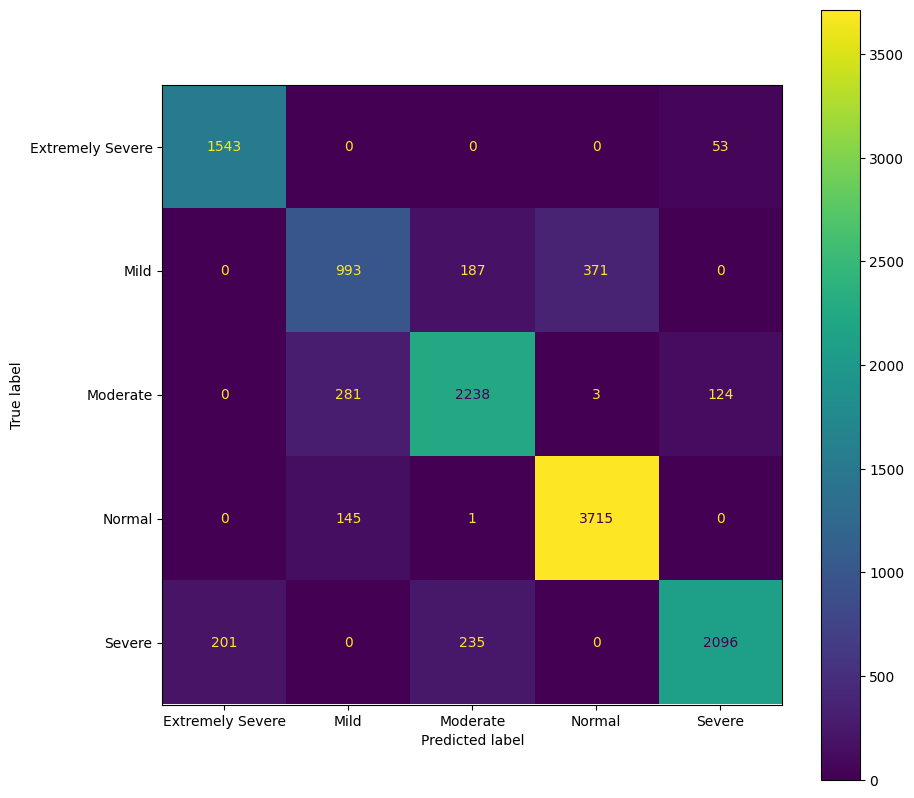

In [172]:
Knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
acc_knn=round(accuracy_score(y_test,Knn.predict(X_test_scaled)),3)
F1_knn=round(f1_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
prec_knn=round(precision_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
rec_knn=round(recall_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_knn)
print('F1_Score:',F1_knn)
print('Recall_Score:',rec_knn)
print('Precision_Score:',prec_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knn, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Knn,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knn.predict(X_test_scaled))
print(classification)

**Support Vector Machines**

Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0
Cross Validation Score: 1.0


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      1596
            Mild     0.9987    1.0000    0.9994      1551
        Moderate     1.0000    1.0000    1.0000      2646
          Normal     1.0000    0.9995    0.9997      3861
          Severe     1.0000    1.0000    1.0000      2532

        accuracy                         0.9998     12186
       macro avg     0.9997    0.9999    0.9998     12186
    weighted avg     0.9998    0.9998    0.9998     12186



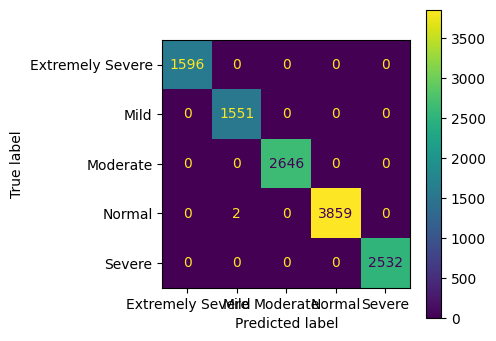

In [173]:
Svm=SVC(C=10, gamma=0.01, kernel='sigmoid').fit(X_train_scaled,y_train)
acc_svm=round(accuracy_score(y_test,Svm.predict(X_test_scaled)),3)
F1_svm=round(f1_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
prec_svm=round(precision_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
rec_svm=round(recall_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_svm)
print('F1_Score:',F1_svm)
print('Recall_Score:',rec_svm)
print('Precision_Score:',prec_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svm, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(Svm,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svm.predict(X_test_scaled))
print(classification)

In [174]:
Result_1={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[acc_ran*100,acc_dt*100,acc_gb*100,acc_knn*100,acc_svm*100],
                  'F1_Score(%)':[F1_ran*100,F1_dt*100,F1_gb*100,F1_knn*100,F1_svm*100],
                  'Precision(%)':[prec_ran*100,prec_dt*100,prec_gb*100,prec_knn*100,prec_svm*100],
                  'Recall(%)':[rec_ran*100,rec_dt*100,rec_gb*100,rec_knn*100,rec_svm*100]
                    }
Result_Stress=pd.DataFrame(Result_1)
Result_Stress.to_csv('./Result_Stress.csv', index=False)

                                                                                            
                                                                                                                

# 3. Model for Anxiety

In [175]:
Anxiety.columns

Index(['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'religion', 'orientation', 'race', 'married',
       'familysize', 'Age_Groups', 'Condition'],
      dtype='object')

In [177]:
scaler=MinMaxScaler()
X=Anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'religion',
        'orientation', 'race', 'familysize',
        'Age_Groups']]
y=Anxiety[['Condition']].values
y = y.flatten()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest**

Accuracy: 0.849
F1_Score: 0.827
Recall_Score: 0.839
Precision_Score: 0.849
Cross Validation Score: 0.849042838600362


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     0.9313    0.9705    0.9505      4006
            Mild     0.6386    0.1161    0.1965       913
        Moderate     0.7173    0.8904    0.7945      2282
          Normal     0.8824    0.9840    0.9304      3119
          Severe     0.8175    0.6720    0.7376      1866

        accuracy                         0.8493     12186
       macro avg     0.7974    0.7266    0.7219     12186
    weighted avg     0.8393    0.8493    0.8271     12186



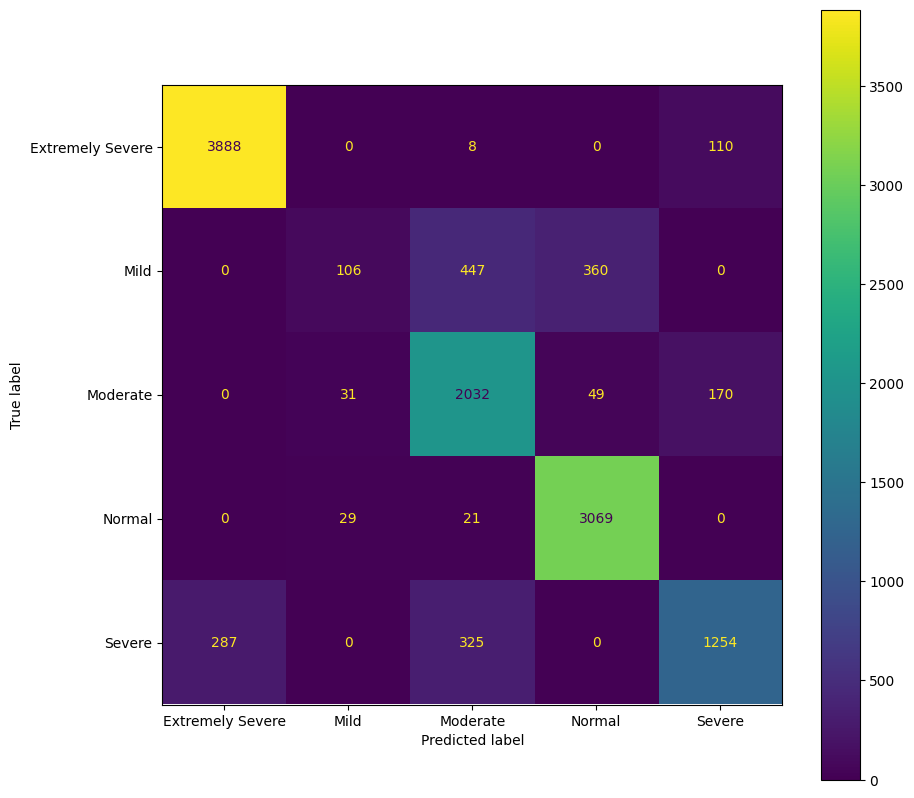

In [178]:
rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)
accu_ran=round(accuracy_score(y_test,rand.predict(X_test_scaled)),3)
f1_score_ran=round(f1_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Precision_ran=round(precision_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Recall_ran=round(recall_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_ran)
print('F1_Score:',f1_score_ran)
print('Recall_Score:',Precision_ran)
print('Precision_Score:',Recall_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(rand, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rand,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=rand.predict(X_test_scaled))
print(classification)

**Decision Tree**

Accuracy: 0.729
F1_Score: 0.728
Recall_Score: 0.727
Precision_Score: 0.729
Cross Validation Score: 0.7308319551667725


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     0.8764    0.8884    0.8824      4006
            Mild     0.3301    0.2957    0.3120       913
        Moderate     0.5833    0.6245    0.6032      2282
          Normal     0.8753    0.8641    0.8696      3119
          Severe     0.5255    0.5027    0.5138      1866

        accuracy                         0.7293     12186
       macro avg     0.6381    0.6351    0.6362     12186
    weighted avg     0.7266    0.7293    0.7277     12186



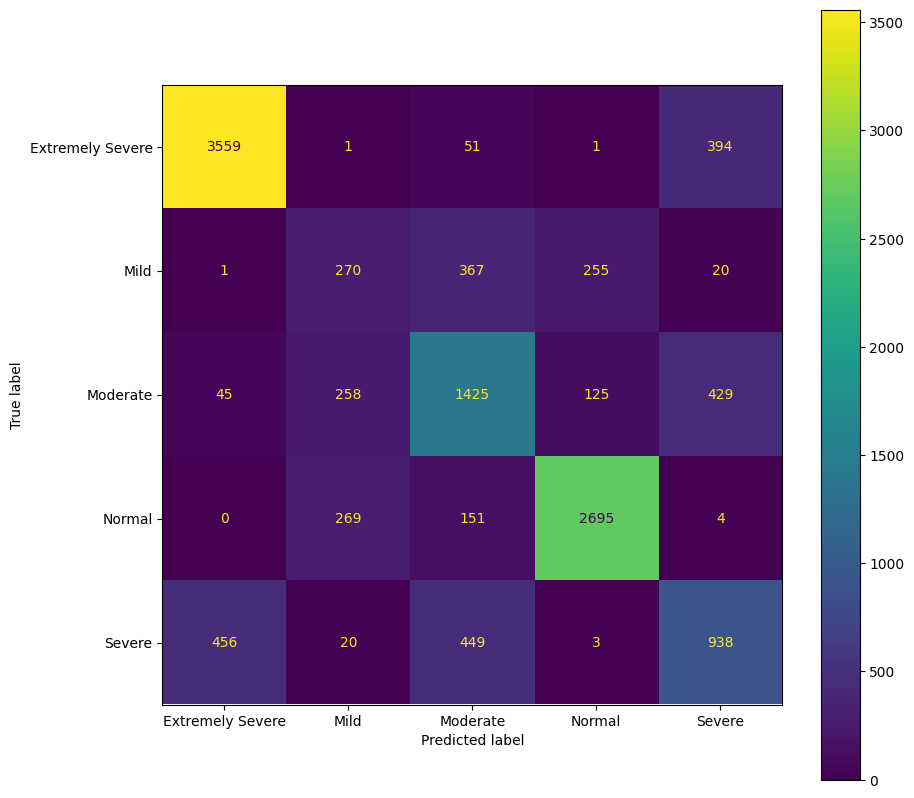

In [179]:
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=100,min_samples_leaf=9,min_samples_split=3).fit(X_train_scaled,y_train)
accu_dt=round(accuracy_score(y_test,Dt.predict(X_test_scaled)),3)
f1_score_dt=round(f1_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Precision_dt=round(precision_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Recall_dt=round(recall_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_dt)
print('F1_Score:',f1_score_dt)
print('Recall_Score:',Precision_dt)
print('Precision_Score:',Recall_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(Dt, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Dt,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Dt.predict(X_test_scaled))
print(classification)

**Gaussian Naive Bayes**

Accuracy: 0.817
F1_Score: 0.825
Recall_Score: 0.843
Precision_Score: 0.817
Cross Validation Score: 0.8177560087921449


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     0.9927    0.8532    0.9177      4006
            Mild     0.4759    0.5411    0.5064       913
        Moderate     0.7172    0.8046    0.7584      2282
          Normal     0.9733    0.8519    0.9085      3119
          Severe     0.6398    0.8280    0.7218      1866

        accuracy                         0.8165     12186
       macro avg     0.7598    0.7757    0.7626     12186
    weighted avg     0.8434    0.8165    0.8247     12186



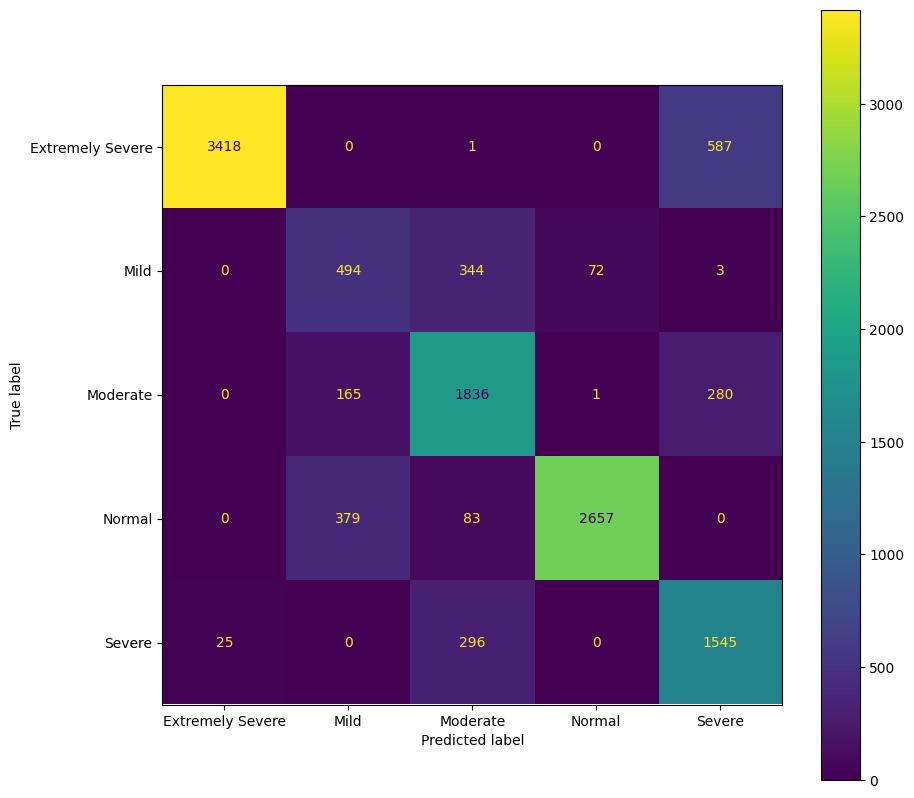

In [180]:
GB=GaussianNB().fit(X_train_scaled,y_train)
accu_gb=round(accuracy_score(y_test,GB.predict(X_test_scaled)),3)
f1_score_gb=round(f1_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Precision_gb=round(precision_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Recall_gb=round(recall_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_gb)
print('F1_Score:',f1_score_gb)
print('Recall_Score:',Precision_gb)
print('Precision_Score:',Recall_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(GB, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GB,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=GB.predict(X_test_scaled))
print(classification)

**Nearest Neighbors**

Accuracy: 0.815
F1_Score: 0.787
Recall_Score: 0.794
Precision_Score: 0.815
Cross Validation Score: 0.8163415660565239


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     0.9507    0.9583    0.9545      4006
            Mild     0.3770    0.0504    0.0889       913
        Moderate     0.7188    0.8098    0.7616      2282
          Normal     0.7525    0.9990    0.8584      3119
          Severe     0.8219    0.5788    0.6792      1866

        accuracy                         0.8148     12186
       macro avg     0.7242    0.6793    0.6685     12186
    weighted avg     0.7938    0.8148    0.7868     12186



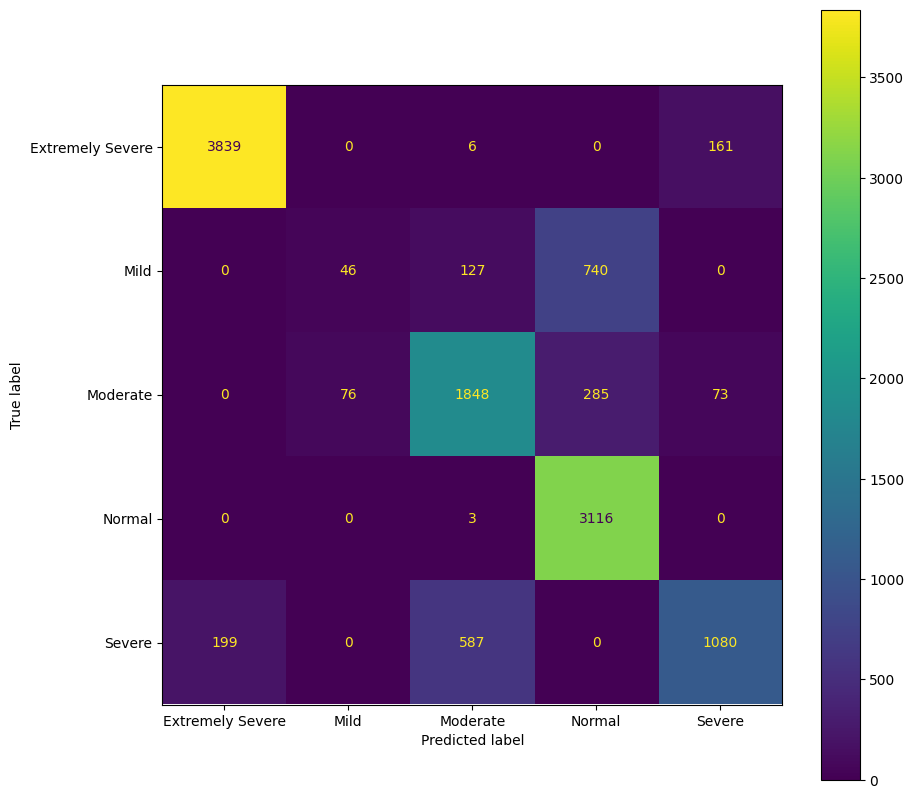

In [181]:
Knnr=KNeighborsClassifier(n_neighbors=19,weights='distance').fit(X_train_scaled,y_train)
accu_knn=round(accuracy_score(y_test,Knnr.predict(X_test_scaled)),3)
f1_score_knn=round(f1_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Precision_knn=round(precision_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Recall_knn=round(recall_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_knn)
print('F1_Score:',f1_score_knn)
print('Recall_Score:',Precision_knn)
print('Precision_Score:',Recall_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knnr, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Knnr,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knnr.predict(X_test_scaled))
print(classification)

**Support Vector Machines**

Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0
Cross Validation Score: 1.0


C:\Users\sabbi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      4006
            Mild     1.0000    1.0000    1.0000       913
        Moderate     1.0000    1.0000    1.0000      2282
          Normal     1.0000    1.0000    1.0000      3119
          Severe     1.0000    1.0000    1.0000      1866

        accuracy                         1.0000     12186
       macro avg     1.0000    1.0000    1.0000     12186
    weighted avg     1.0000    1.0000    1.0000     12186



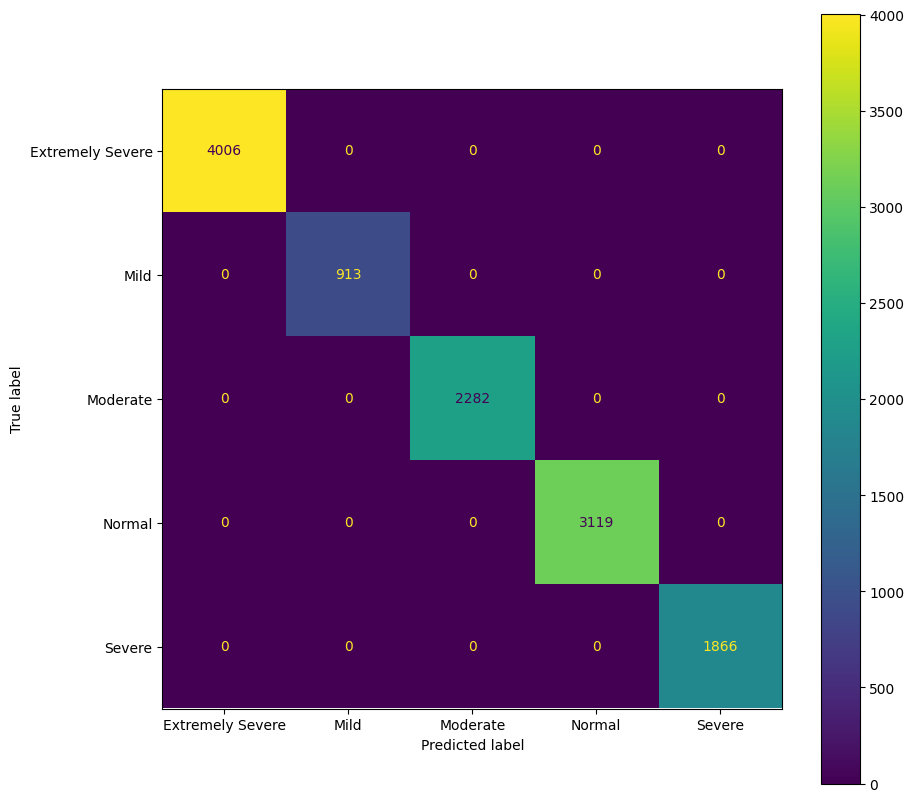

In [182]:
Svmc=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,Svmc.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svmc, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Svmc,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svmc.predict(X_test_scaled))
print(classification)

In [183]:
Result_2={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[accu_ran*100,accu_dt*100,accu_gb*100,accu_knn*100,accu_svm*100],
                  'F1_Score(%)':[f1_score_ran*100,f1_score_dt*100,f1_score_gb*100,f1_score_knn*100,f1_score_svm*100],
                  'Precision(%)':[Precision_ran*100,Precision_dt*100,Precision_gb*100,Precision_knn*100,Precision_svm*100],
                  'Recall(%)':[Recall_ran*100,Recall_dt*100,Recall_gb*100,Recall_knn*100,Recall_svm*100]
        
                    }
Result_Anxiety=pd.DataFrame(Result_2)

Result_Anxiety.to_csv('./Result_Anxiety.csv', index=False)
                                                                                            
                                                                                                                

# Results Achieved from above Modellings

In [184]:
Result_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,92.5,92.2,92.4,92.5
1,Decision-Tree,79.2,79.3,79.4,79.2
2,GaussianNB,87.3,87.9,89.6,87.3
3,Nearest-Neighbors,88.6,88.1,88.5,88.6
4,SVM,100.0,100.0,100.0,100.0


In [185]:
Result_Stress

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,88.6,88.4,88.7,88.6
1,Decision-Tree,74.0,74.2,74.5,74.0
2,GaussianNB,85.1,85.6,87.1,85.1
3,Nearest-Neighbors,86.9,86.7,86.7,86.9
4,SVM,100.0,100.0,100.0,100.0


In [186]:
Result_Anxiety

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,84.9,82.7,83.9,84.9
1,Decision-Tree,72.9,72.8,72.7,72.9
2,GaussianNB,81.7,82.5,84.3,81.7
3,Nearest-Neighbors,81.5,78.7,79.4,81.5
4,SVM,100.0,100.0,100.0,100.0


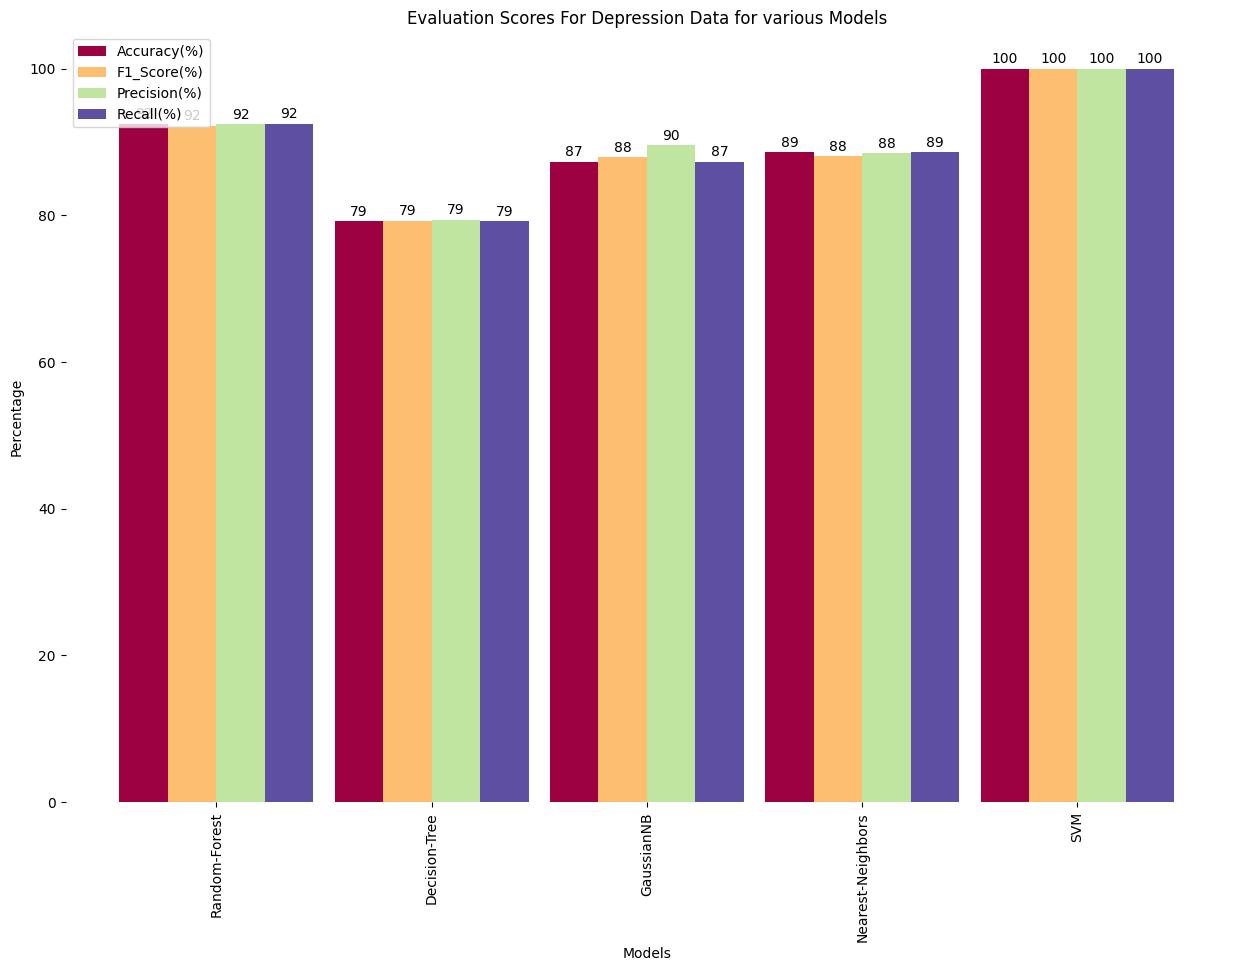

In [187]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Depression Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

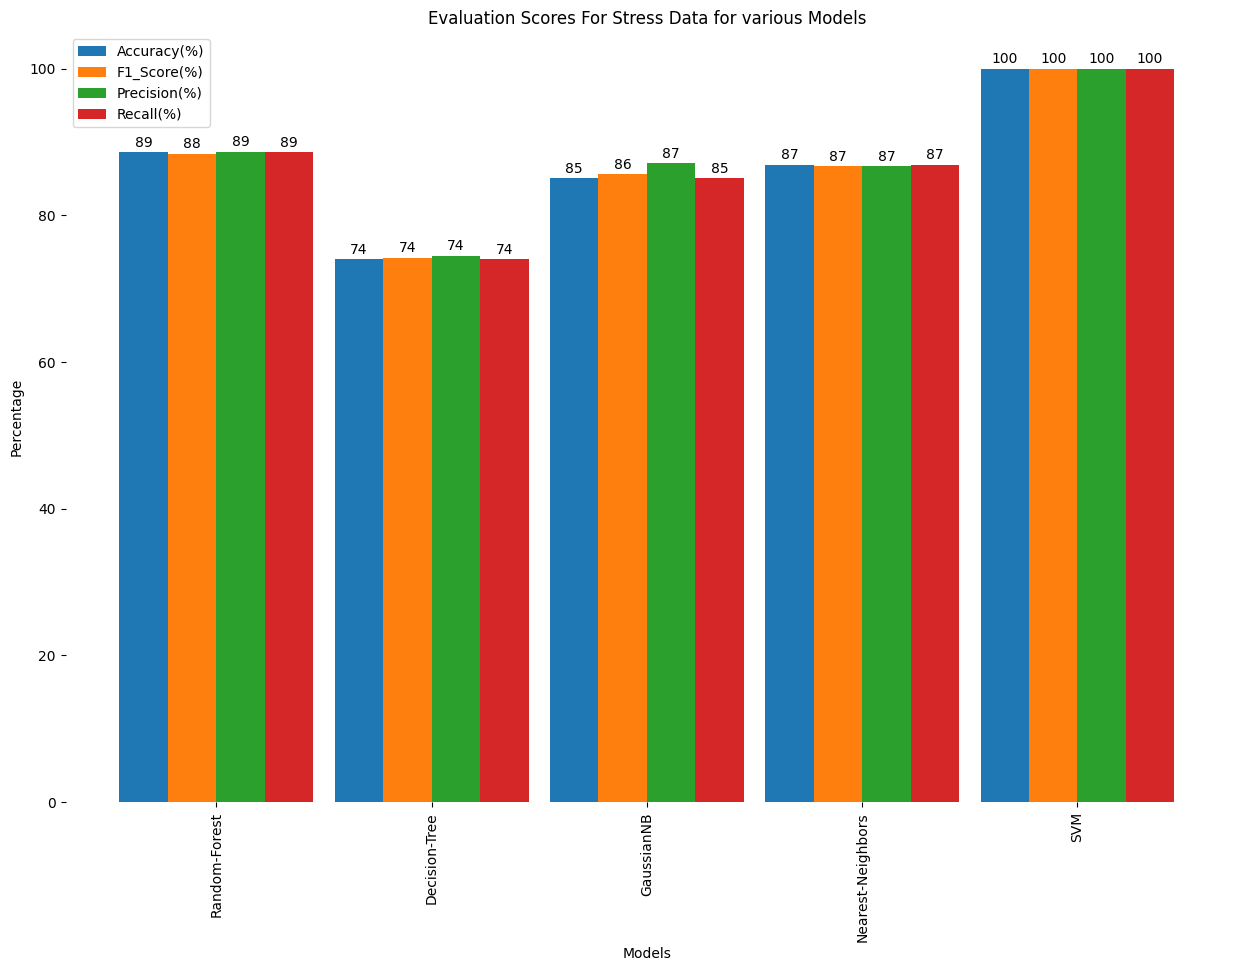

In [188]:
slot=Result_Stress.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Stress Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

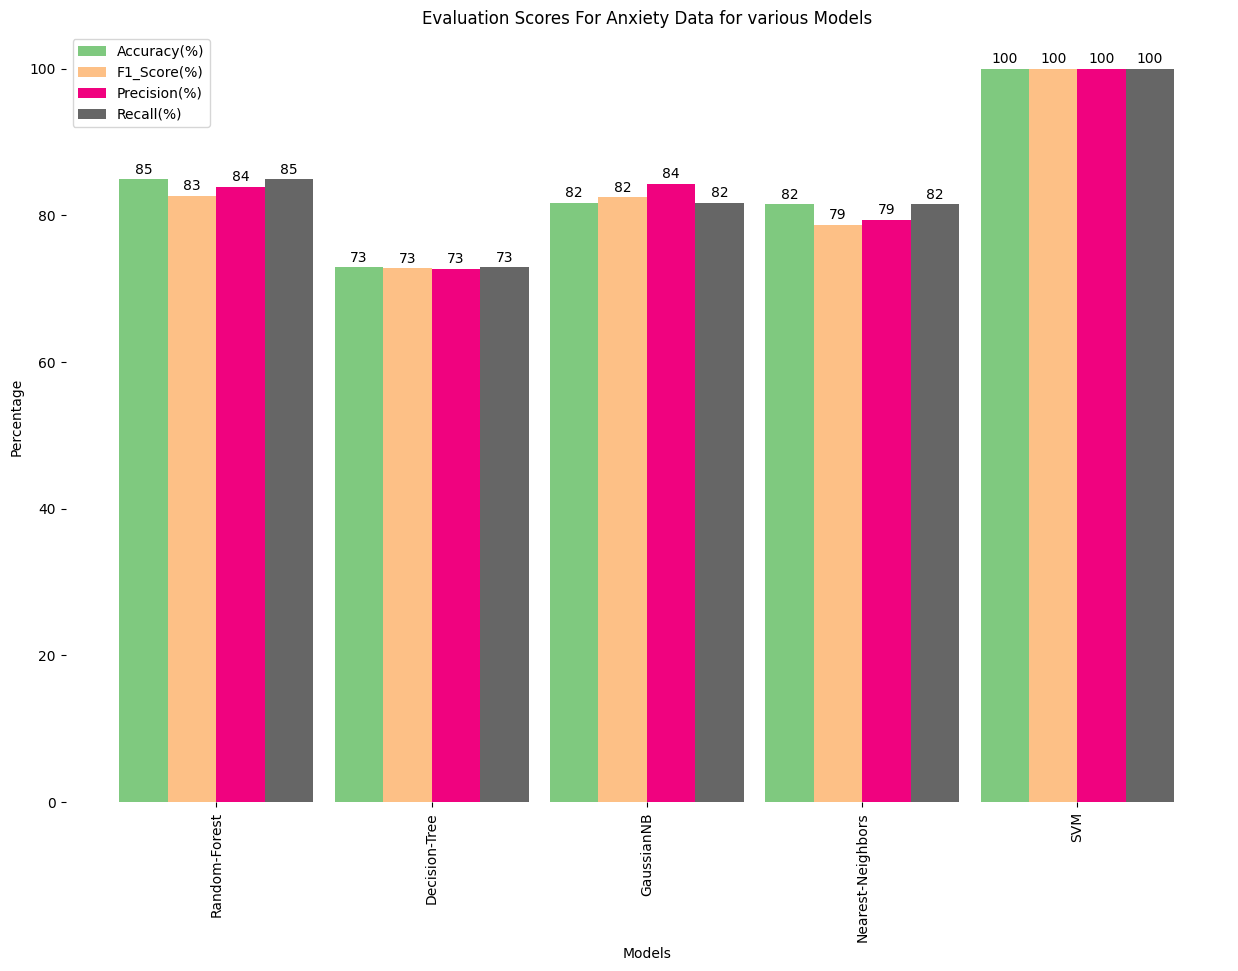

In [189]:
slot=Result_Anxiety.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Accent',width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Anxiety Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

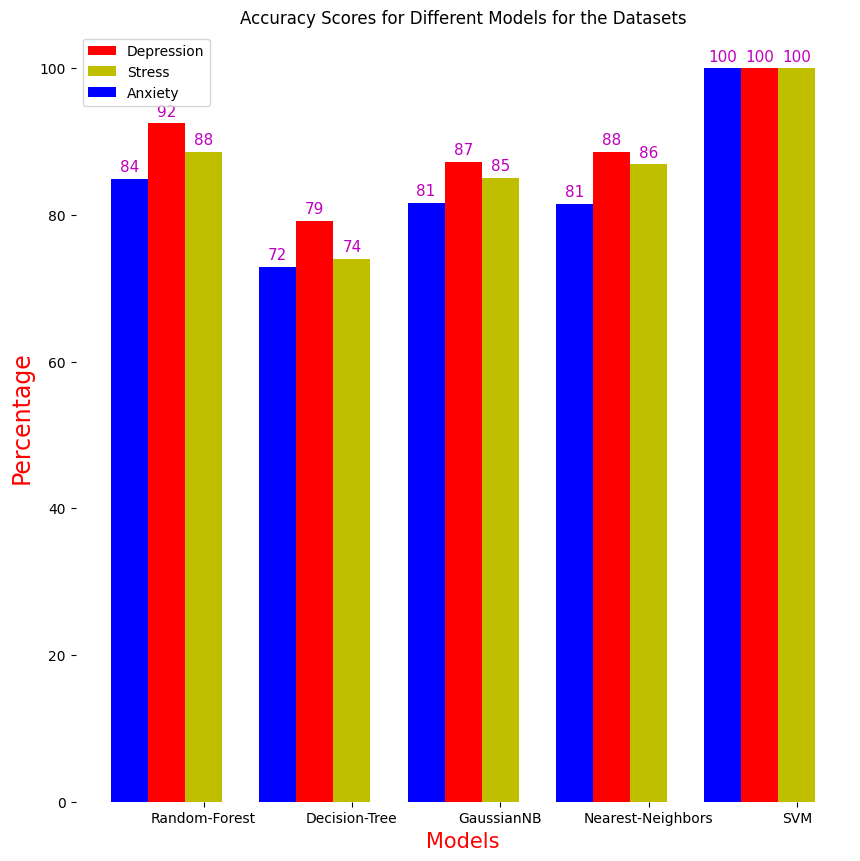

In [190]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
widt=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Accuracy(%)'],widt,color='r')
bar2=plt.bar(X+widt,Result_Stress['Accuracy(%)'],widt,color='y')
bar3=plt.bar(X-widt,Result_Anxiety['Accuracy(%)'],widt,color='b')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
plt.xticks(X+widt,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Accuracy Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


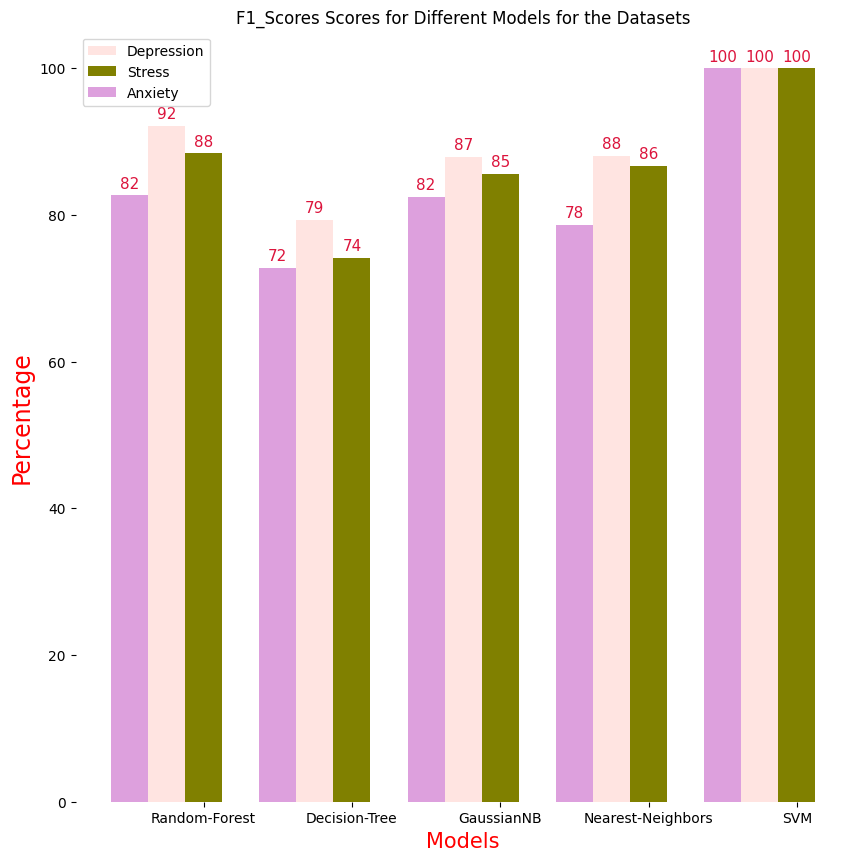

In [191]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['F1_Score(%)'],width,color='mistyrose')
bar2=plt.bar(X+width,Result_Stress['F1_Score(%)'],width,color='olive')
bar3=plt.bar(X-width,Result_Anxiety['F1_Score(%)'],width,color='plum')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('F1_Scores Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


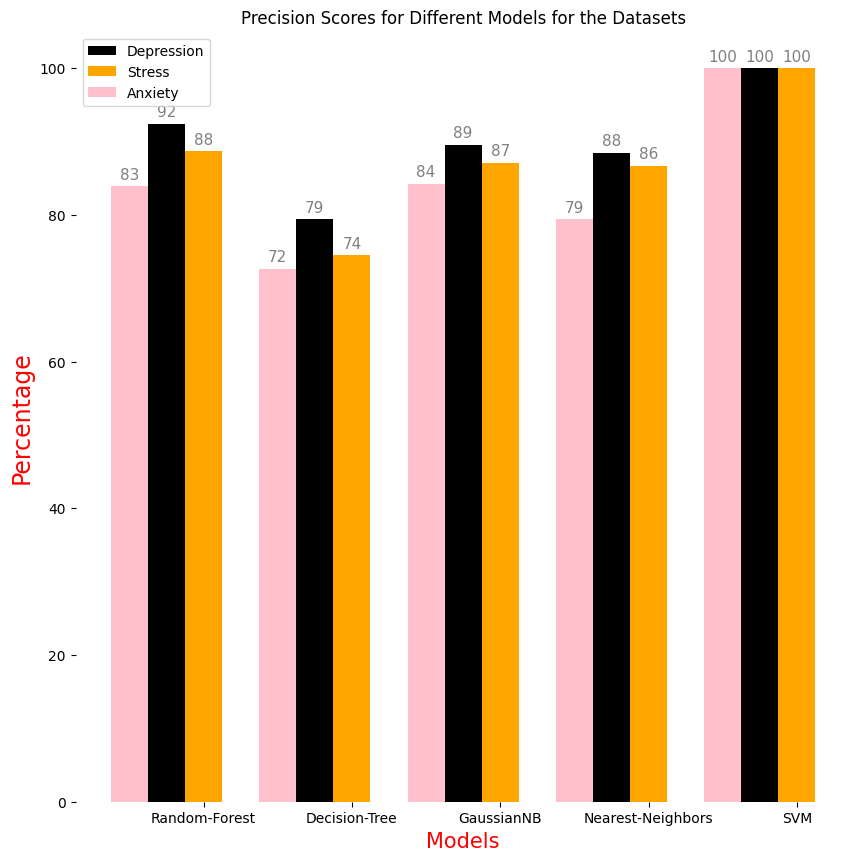

In [192]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Precision(%)'],width,color='black')
bar2=plt.bar(X+width,Result_Stress['Precision(%)'],width,color='orange')
bar3=plt.bar(X-width,Result_Anxiety['Precision(%)'],width,color='pink')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Precision Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


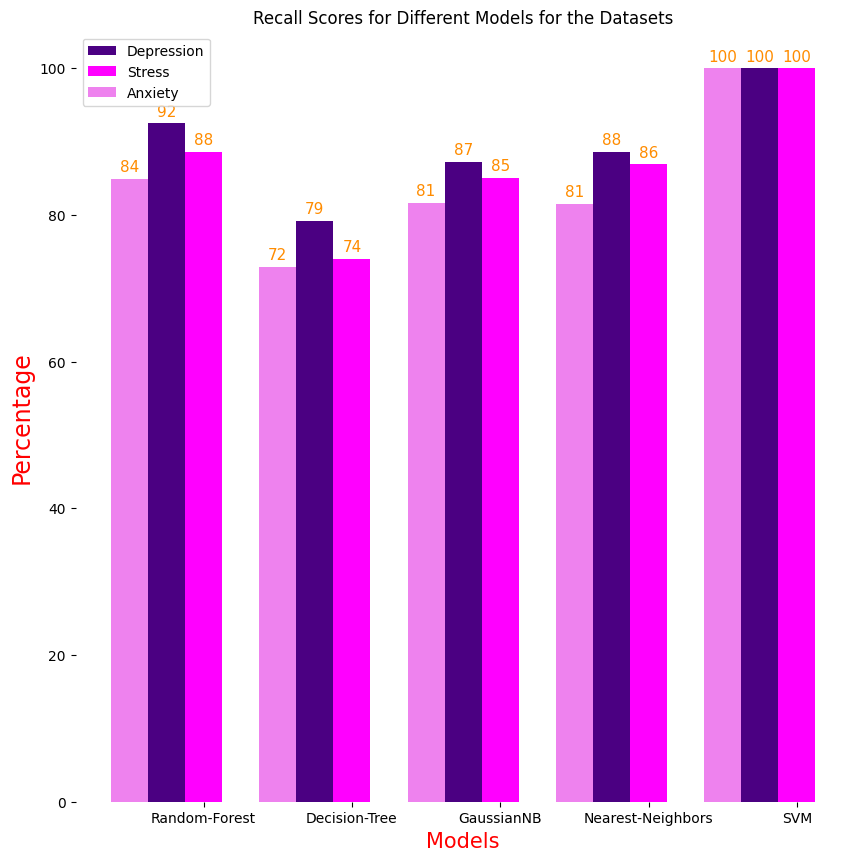

In [193]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Recall(%)'],width,color='indigo')
bar2=plt.bar(X+width,Result_Stress['Recall(%)'],width,color='magenta')
bar3=plt.bar(X-width,Result_Anxiety['Recall(%)'],width,color='violet')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Recall Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
